In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import src
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [57]:
src.plots.setup_color()

In [4]:
def plot_alpha_scatter(red, n, stat='mean'):
    
    lrg_t = src.utils.extract([f'/localdata/desi/mcmc_bk_{red}_LRGz0_mock{i}_none_p1_p5_1k_False.npz' for i in range(n)], stat)
    lrg_0 = src.utils.extract([f'/localdata/desi/mcmc_bk_{red}_LRGz0_mock{i}_0_p1_p5_1k_False.npz' for i in range(n)], stat)
    lrg_1 = src.utils.extract([f'/localdata/desi/mcmc_bk_{red}_LRGz0_mock{i}_1_p1_p5_1k_False.npz' for i in range(n)], stat)
    lrg_2 = src.utils.extract([f'/localdata/desi/mcmc_bk_{red}_LRGz0_mock{i}_2_p1_p5_1k_False.npz' for i in range(n)], stat)
    lrg_3 = src.utils.extract([f'/localdata/desi/mcmc_bk_{red}_LRGz0_mock{i}_3_p1_p5_1k_False.npz' for i in range(n)], stat)
    lrg_4 = src.utils.extract([f'/localdata/desi/mcmc_bk_{red}_LRGz0_mock{i}_4_p1_p5_1k_False.npz' for i in range(n)], stat)
    lrg_5 = src.utils.extract([f'/localdata/desi/mcmc_bk_{red}_LRGz0_mock{i}_5_p1_p5_1k_False.npz' for i in range(n)], stat)

    lgs = [lrg_0, lrg_1, lrg_2, lrg_3, lrg_4, lrg_5]
    kl = [0.17, 0.19, 0.21, 0.23, 0.25]

    #
    fg, ax = plt.subplots(ncols=3,
                          nrows=2,
                          figsize=(21, 8), 
                          sharey=True)
    fg.subplots_adjust(wspace=0.02, hspace=0.4)
    ax = ax.flatten()

    for i, lg_i in enumerate(lgs):    
        for j in range(5):
            ax[i].scatter(lg_i[:, j], lrg_t[:, j], label=f'0.05 < k < {kl[j]}')
        ax[i].set_xlabel('alpha [c00%d]'%i)

    #ax[0].set_ylabel('alpha [mean of mocks template]')
    ax[3].set_ylabel('alpha [mean of mocks temp]')
    
    lgn = ax[-1].legend(frameon=True)
    for i, tx in enumerate(lgn.get_texts()):
        tx.set_color('C%d'%i)
        
    ax[1].set_title(f'reduced: {red}, alpha: {stat}')
    fg.savefig(f'alpha_c000vsc00i_{red}_{stat}.png', dpi=300, bbox_inches='tight')

In [9]:
import camb

In [5]:
from cosmoprimo import Fourier, Cosmology, PowerSpectrumBAOFilter, fiducial

In [6]:
fiducial.AbacusSummit_params()[0]

{'tau_reio': 0.0544,
 'omega_k': 0.0,
 'omega_b': 0.02237,
 'omega_cdm': 0.12,
 'h': 0.6736,
 'A_s': 2.083e-09,
 'n_s': 0.9649,
 'alpha_s': 0.0,
 'N_ur': 2.0328,
 'omega_ncdm': 0.0006442,
 'w0_fld': -1.0,
 'wa_fld': 0.0}

In [43]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.36, ombh2=0.02237, omch2=0.12,)
results = camb.get_background(pars)
results.get_derived_params()['rdrag']

147.10121690363943

In [32]:
fiducial.AbacusSummit_params()[1]

{'tau_reio': 0.0544,
 'omega_k': 0.0,
 'omega_b': 0.02242,
 'omega_cdm': 0.1134,
 'h': 0.703,
 'A_s': 2.0376e-09,
 'n_s': 0.9638,
 'alpha_s': 0.0,
 'N_ur': 2.0328,
 'omega_ncdm': 0.0006442,
 'w0_fld': -1.0,
 'wa_fld': 0.0}

In [42]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=70.3, ombh2=0.02242, omch2=0.1134)
results = camb.get_background(pars)
results.get_derived_params()['rdrag']

148.82272223530032

In [58]:
#r = (147.1012/0.6736)/(148.8227/0.703)  # r_d/h
r = (147.1012*0.6736)/(148.8227*0.703)  # r_d h
r

0.9470955359779833

In [ ]:
# 1. check if the distributions of best fit /mean alphas are consistent
# 2. for the true template, we would expect to <alpha > = 1.. for other ones, we would expect <alpha> is scaled by rd/h 
# 3. ask around if anyone has BAO measurements for these boxes
# 4. comparison of Pk's alpha and Bk's
# 5. see if the sound horizon scale scales as 1/(1+z), or if the values at two redshifts scales proportionally

In [59]:
red='raw'
n=25
# lrg_t = src.utils.extract([f'/localdata/desi/mcmc_bk_{red}_LRGz0_mock{i}_none_p1_p5_1k_False.npz' for i in range(n)], stat)
lrg_0 = src.utils.extract([f'/localdata/desi/mcmc_bk_{red}_LRGz0_mock{i}_0_p1_p5_1k_False.npz' for i in range(n)], 'mean')
lrg_1 = src.utils.extract([f'/localdata/desi/mcmc_bk_{red}_LRGz0_mock{i}_1_p1_p5_1k_False.npz' for i in range(n)], 'mean')
lrg_0b = src.utils.extract([f'/localdata/desi/mcmc_bk_{red}_LRGz0_mock{i}_0_p1_p5_1k_False.npz' for i in range(n)], 'bestfit')
lrg_1b = src.utils.extract([f'/localdata/desi/mcmc_bk_{red}_LRGz0_mock{i}_1_p1_p5_1k_False.npz' for i in range(n)], 'bestfit')

Text(0.5, 0, '$\\alpha$ [best fit]')

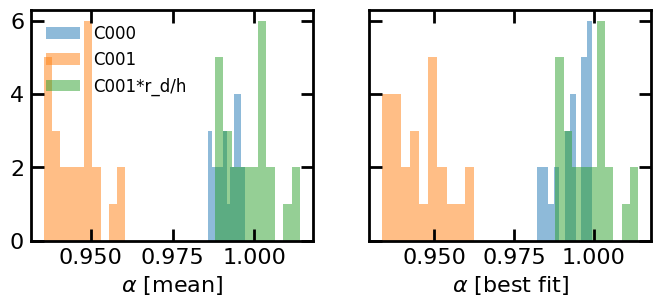

In [62]:
fg, (ax1,ax2) = plt.subplots(ncols=2, figsize=(8, 3), sharey=True)

ax1.hist(lrg_0[:, 4], alpha=0.5, label='C000')
ax1.hist(lrg_1[:, 4], alpha=0.5, label='C001')
ax1.hist(lrg_1[:, 4]/r, alpha=0.5, label='C001*r_d/h')
#ax1.title('Mean MCMC alpha using different templates')
ax1.legend()

ax2.hist(lrg_0b[:, 4], alpha=0.5, label='C000')
ax2.hist(lrg_1b[:, 4], alpha=0.5, label='C001')
ax2.hist(lrg_1[:, 4]/r, alpha=0.5, label='C001*r_d*h')

ax1.set_xlabel(r'$\alpha$ [mean]')
ax2.set_xlabel(r'$\alpha$ [best fit]')

In [ ]:
# maybe something weird occurs when working with the full bispectrum

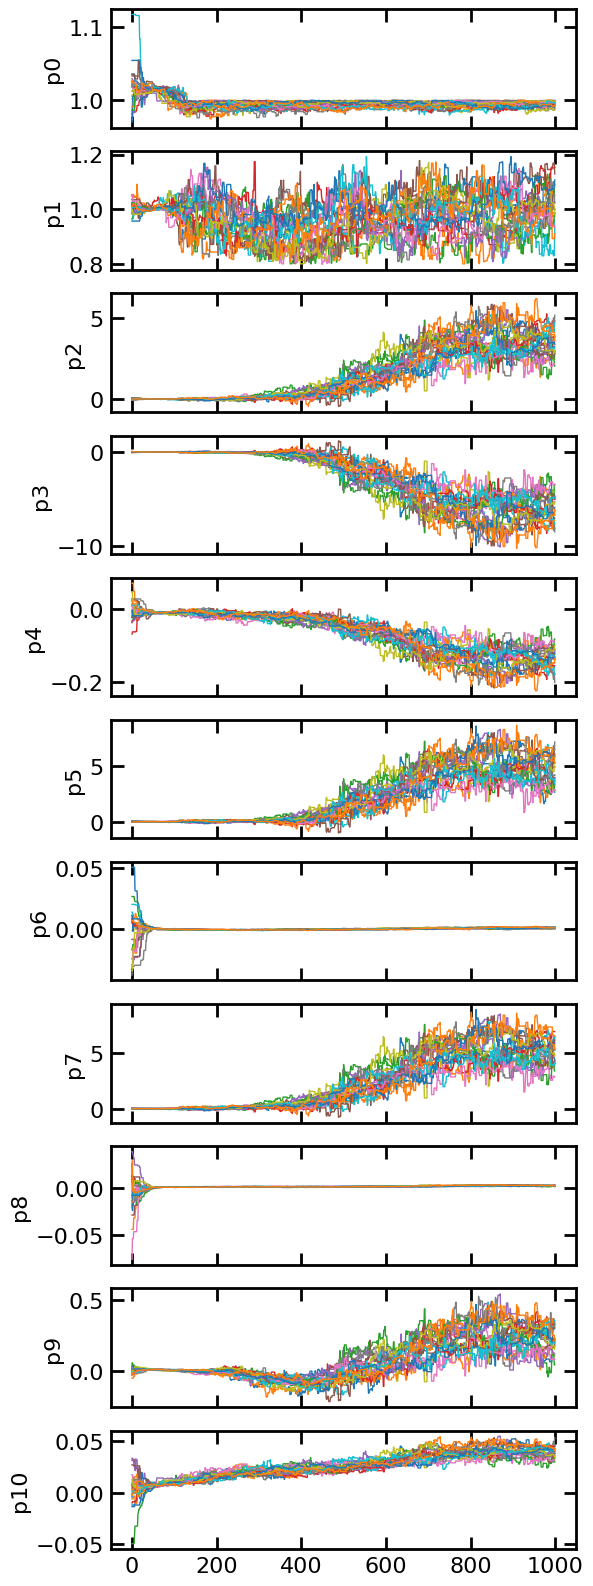

In [7]:
pr = np.load('/localdata/desi/mcmc_bk_raw_LRGz0_mock0_0_p1_p5_1k_False.npz', allow_pickle=True)

fg, ax = plt.subplots(nrows=11, figsize=(6, 20), sharex=True)
for i in range(11):
    ax[i].plot(pr['samples'][4]['chain'][:, :, i], lw=1)    
    ax[i].set_ylabel('p%d'%i)   

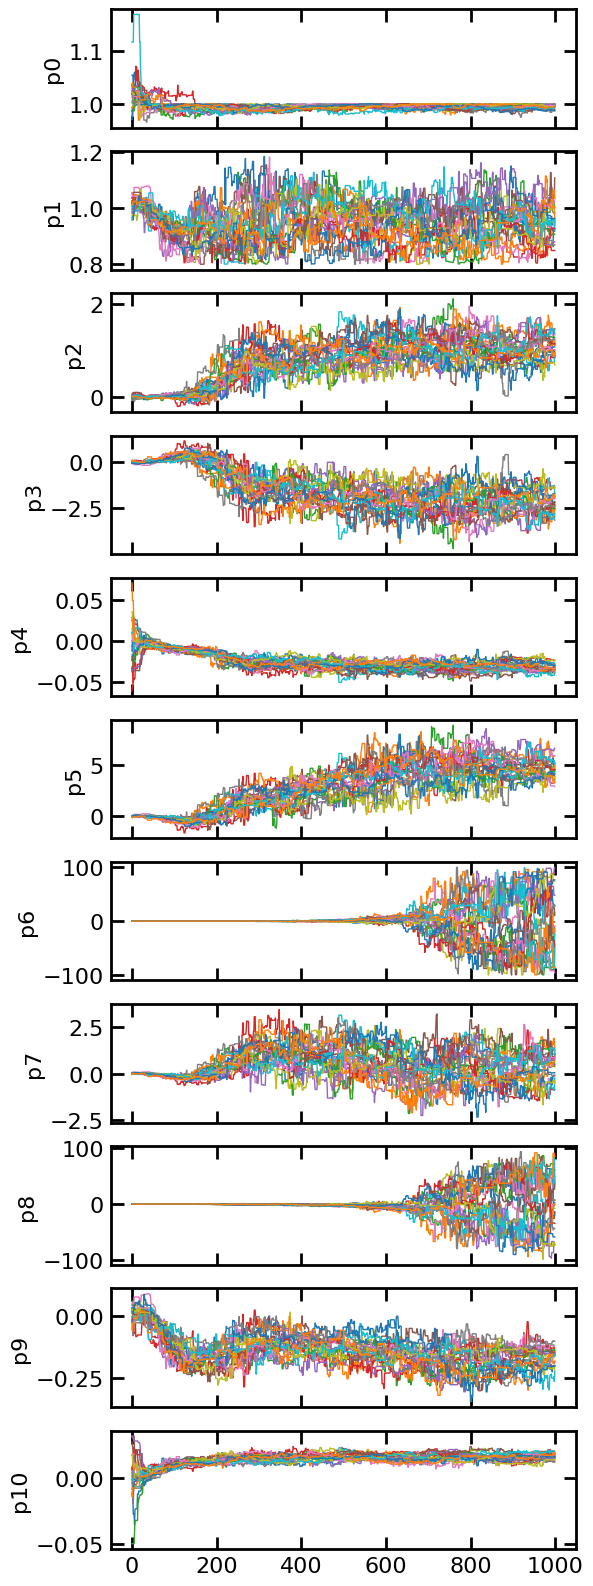

In [8]:
# without 1/k^2 using full covariance
pr = np.load('/localdata/desi/mcmc_bk9_raw_LRGz0_mock0_0_p1_p2_1k_False.npz', allow_pickle=True)

fg, ax = plt.subplots(nrows=11, figsize=(6, 20), sharex=True)
for i in range(11):
    ax[i].plot(pr['samples'][0]['chain'][:, :, i], lw=1)    
    ax[i].set_ylabel('p%d'%i)   

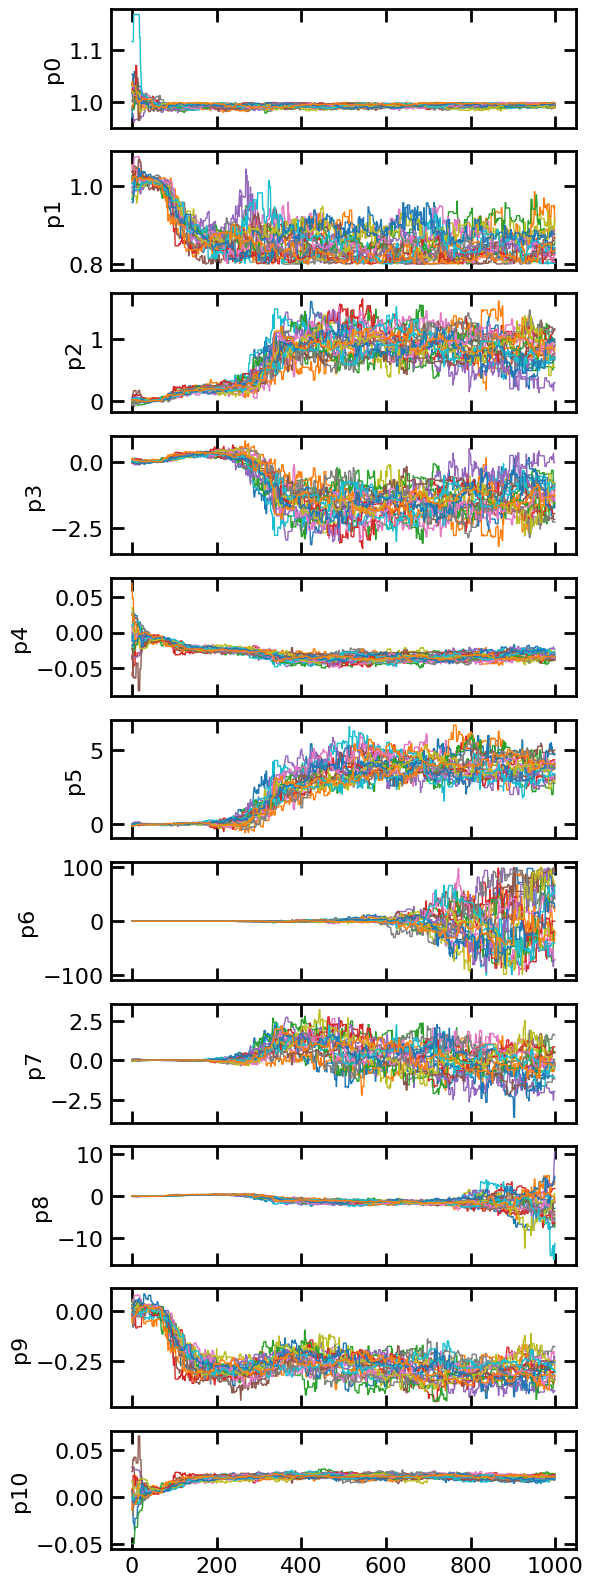

In [9]:
# without 1/k^2 using diagonal covariance
pr = np.load('/localdata/desi/mcmc_bk9_raw_LRGz0_mock0_0_p1_p2_1k_True.npz', allow_pickle=True)

fg, ax = plt.subplots(nrows=11, figsize=(6, 20), sharex=True)
for i in range(11):
    ax[i].plot(pr['samples'][0]['chain'][:, :, i], lw=1)    
    ax[i].set_ylabel('p%d'%i)   

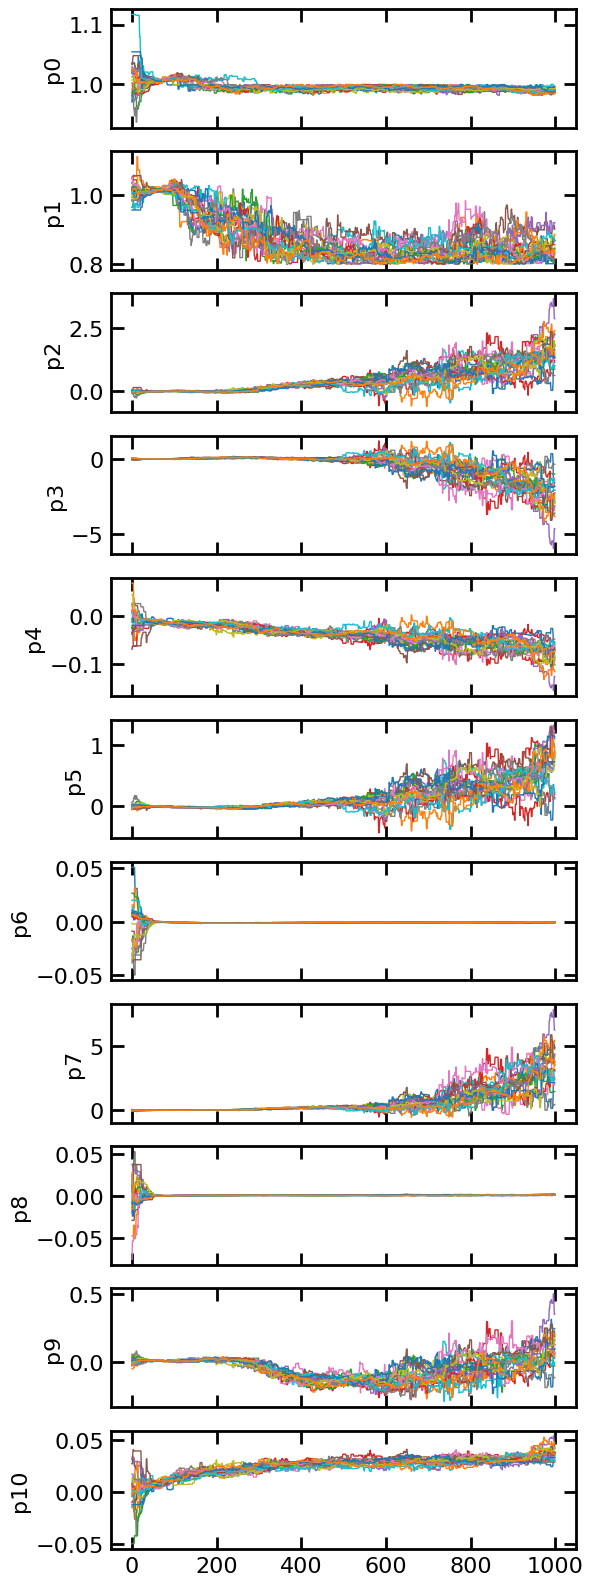

In [10]:
# with 1/k^2 using diagonal covariance
pr = np.load('/localdata/desi/mcmc_bk_raw_LRGz0_mock0_0_p1_p5_1k_True.npz', allow_pickle=True)

fg, ax = plt.subplots(nrows=11, figsize=(6, 20), sharex=True)
for i in range(11):
    ax[i].plot(pr['samples'][4]['chain'][:, :, i], lw=1)    
    ax[i].set_ylabel('p%d'%i)   

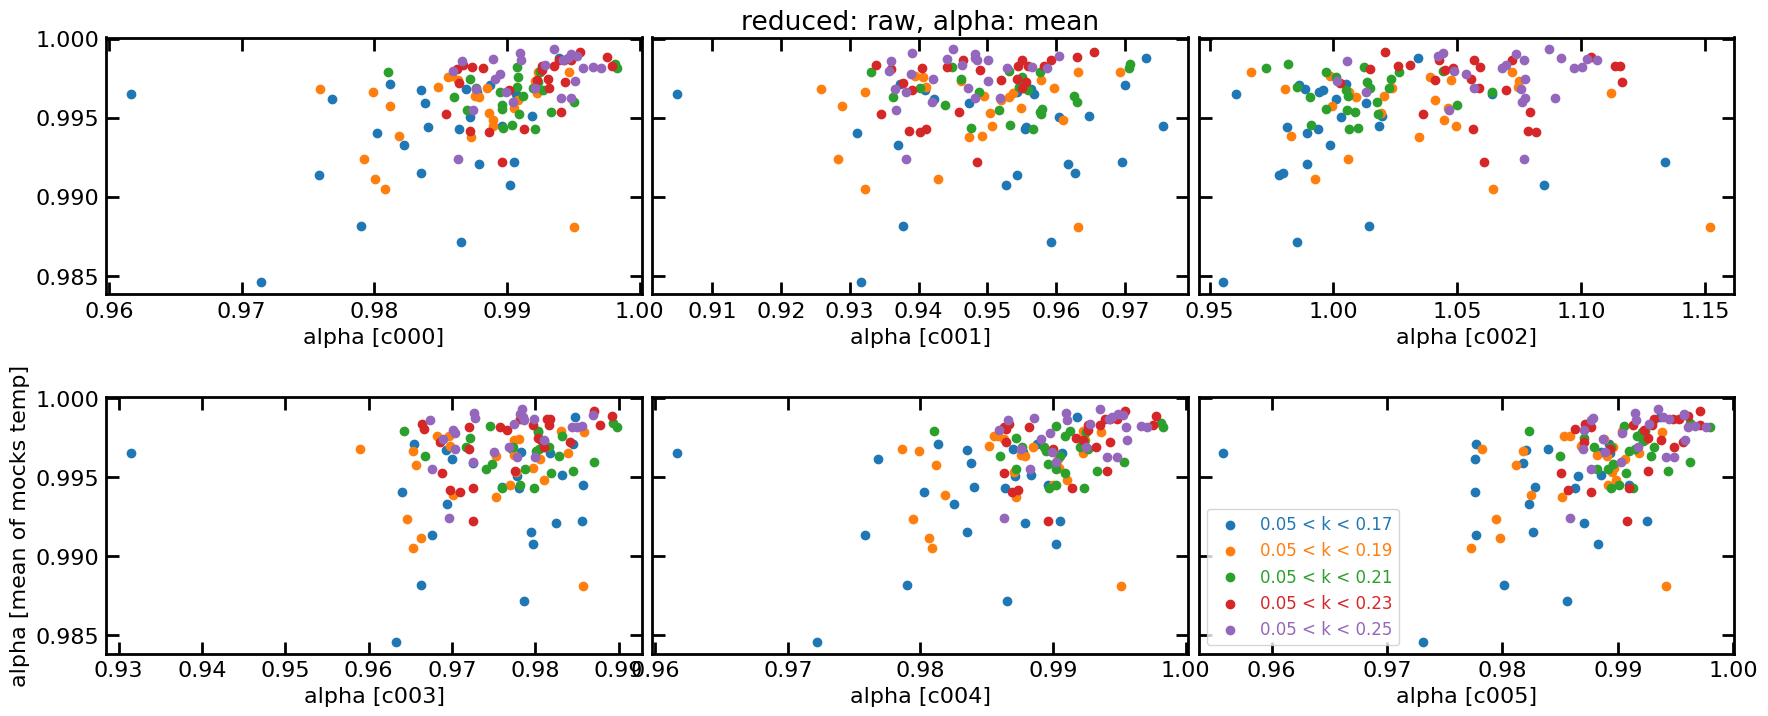

In [14]:
plot_alpha_scatter('raw', 25, 'mean')

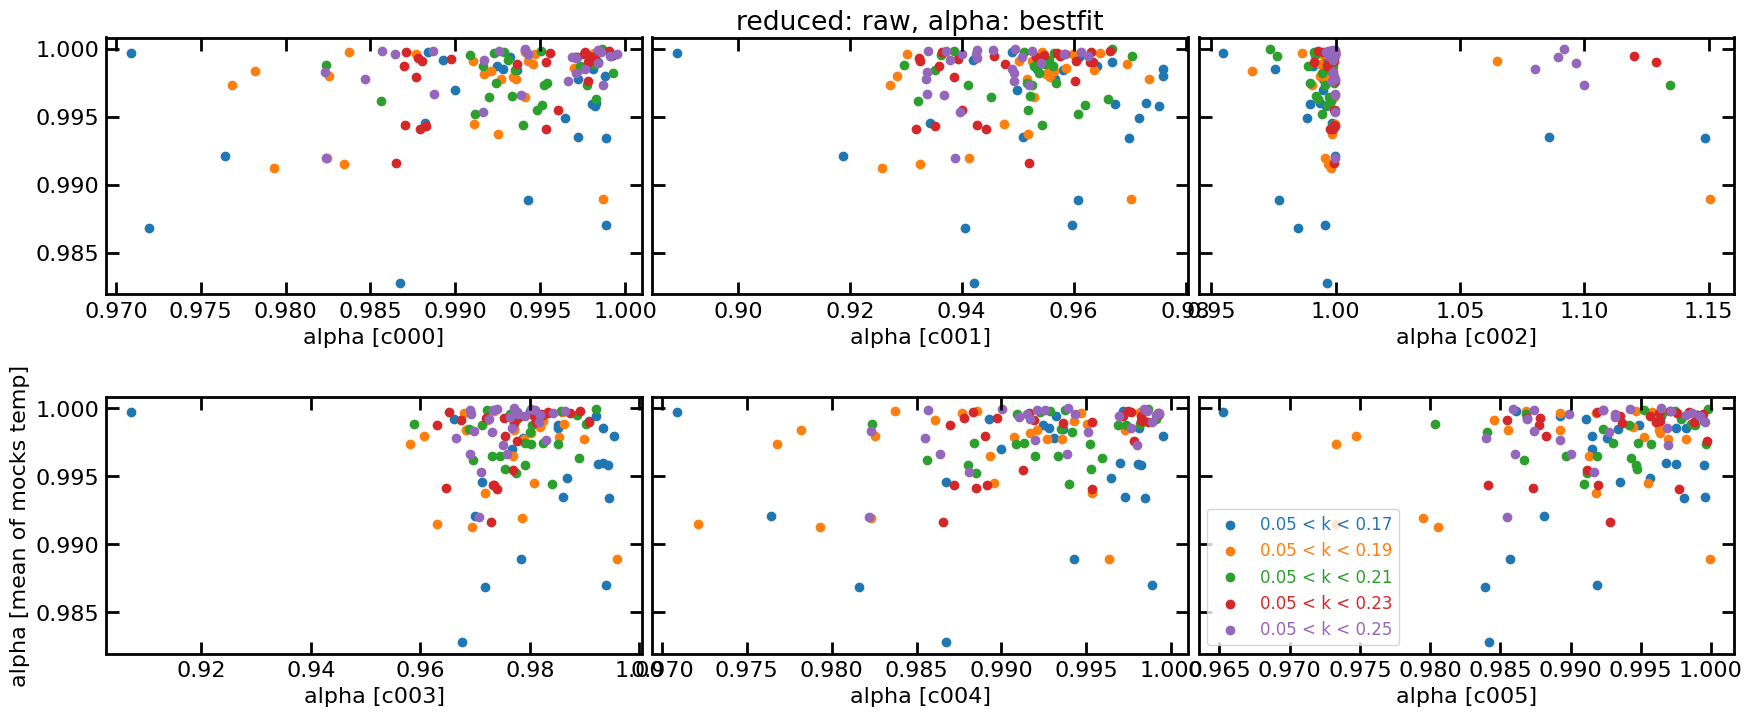

In [15]:
plot_alpha_scatter('raw', 25, 'bestfit')

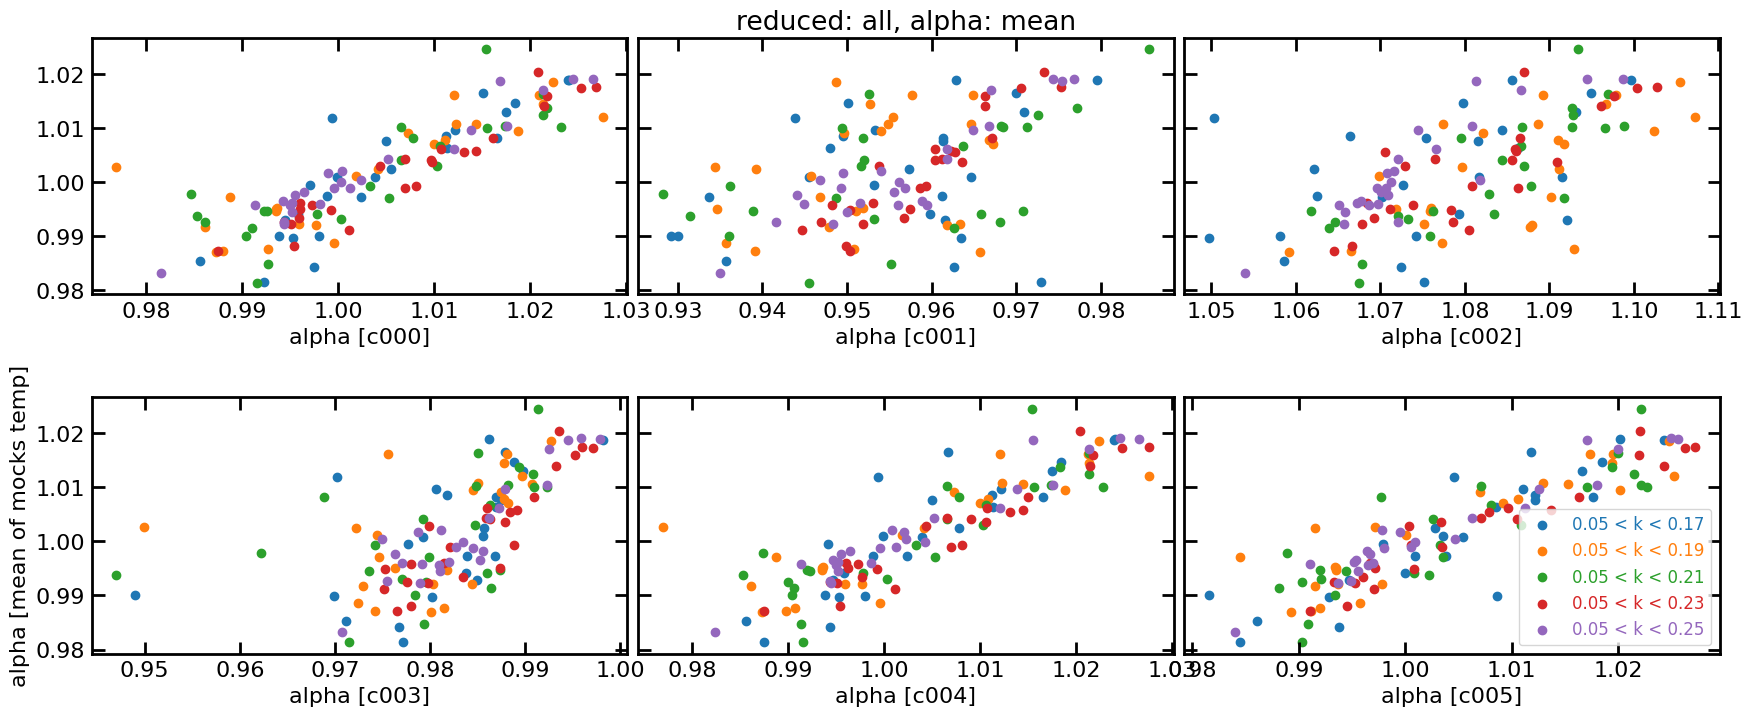

In [16]:
plot_alpha_scatter('all', 25, 'mean')

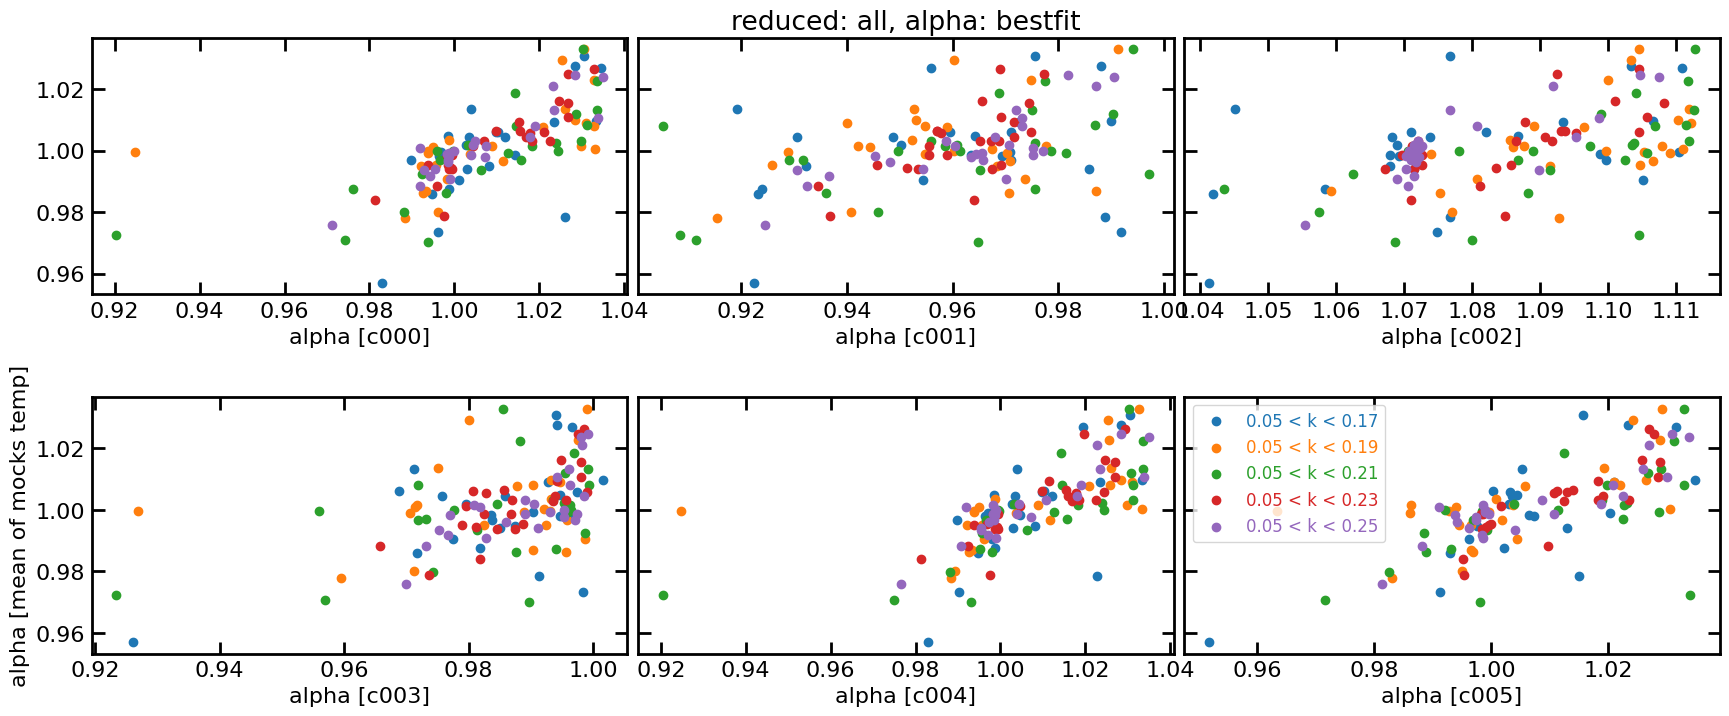

In [17]:
plot_alpha_scatter('all', 25, 'bestfit')

In [5]:
## measurement vs model
(k_obs, r_obs, r_cov), (k_tem, r_tem) = src.utils.load_data('LRGz0', 'bk', 'raw', '0', False)

LRGz0 bk raw 0
tracer: LRGz0


In [6]:
from src.models import BiSpectrum
from src.utils import BisPosterior

In [7]:
pr = np.load('/localdata/desi/mcmc_bk_raw_LRGz0_mock0_0_p1_p5_1k_False.npz', allow_pickle=True)
pr.files

['samples', 'kranges']

In [8]:
ps = BisPosterior()
ps.add_data(k_obs, r_obs[0, :], r_cov)
ps.add_template(k_tem, r_tem)
ps.select_krange(0.05, 0.25)

indices = np.arange(2600)[ps.is_g]

data is added
interpolation done
temp is added
data is cut based on k


In [24]:
pr['samples'][4]['chain'].shape

(1000, 22, 11)

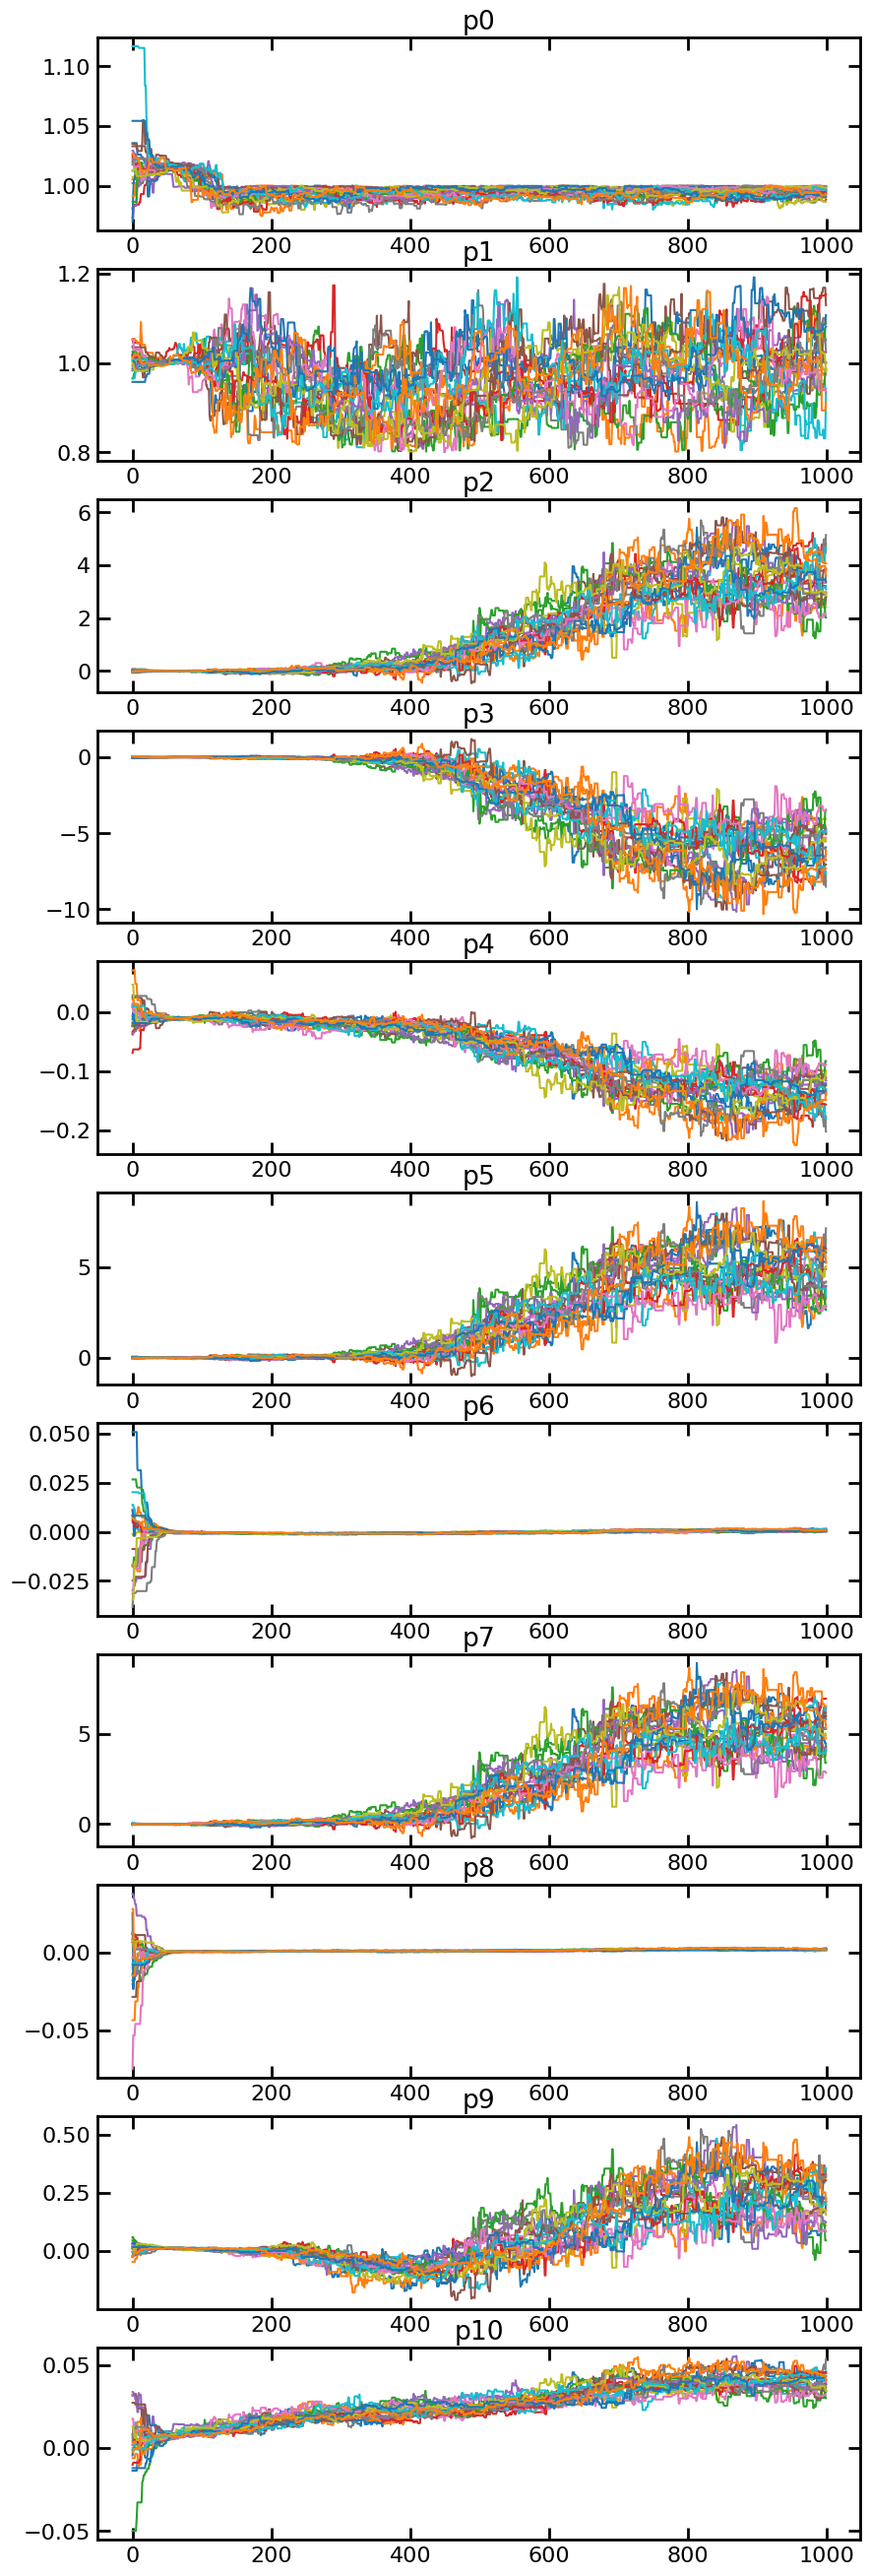

In [26]:
pr = np.load('/localdata/desi/mcmc_bk_raw_LRGz0_mock0_0_p1_p5_1k_False.npz', allow_pickle=True)

fg, ax = plt.subplots(nrows=11, figsize=(10, 33))
for i in range(11):
    ax[i].plot(pr['samples'][4]['chain'][:, :, i])
    
    ax[i].set_title('p%d'%i)

In [10]:
ix = np.unravel_index(np.argmax(pr['samples'][4]['log_prob']), 
                           pr['samples'][4]['log_prob'].shape)
ix

(758, 7)

In [13]:
bf = pr['samples'][4]['chain'][ix]
bf_new = bf + 0.02*np.array([1.]+10*[0.])
bf, bf_new

(array([ 9.98709406e-01,  9.83521969e-01,  3.10792755e+00, -5.41353949e+00,
        -1.23438130e-01,  4.44333932e+00,  3.15673458e-04,  4.69738194e+00,
         1.94207129e-03,  2.17912194e-01,  3.91888427e-02]),
 array([ 1.01870941e+00,  9.83521969e-01,  3.10792755e+00, -5.41353949e+00,
        -1.23438130e-01,  4.44333932e+00,  3.15673458e-04,  4.69738194e+00,
         1.94207129e-03,  2.17912194e-01,  3.91888427e-02]))

In [20]:
ps.logpost(bf)

-1250.252337891856

In [21]:
ps.logpost(bf_new)

-1361.2480881537424

In [23]:
pr['samples'][4]['log_prob'][300:, :].min()

-1279.7926862082136

In [19]:
pr['samples'][4]['chain'][300:, :, 0].max()

0.9999914758431667

In [29]:
rcov = ps.r_cov_[ps.is_g, :][:, ps.is_g]

In [31]:
drcov = np.diagonal(rcov)**0.5

Text(0.5, 0, 'triangle indices')

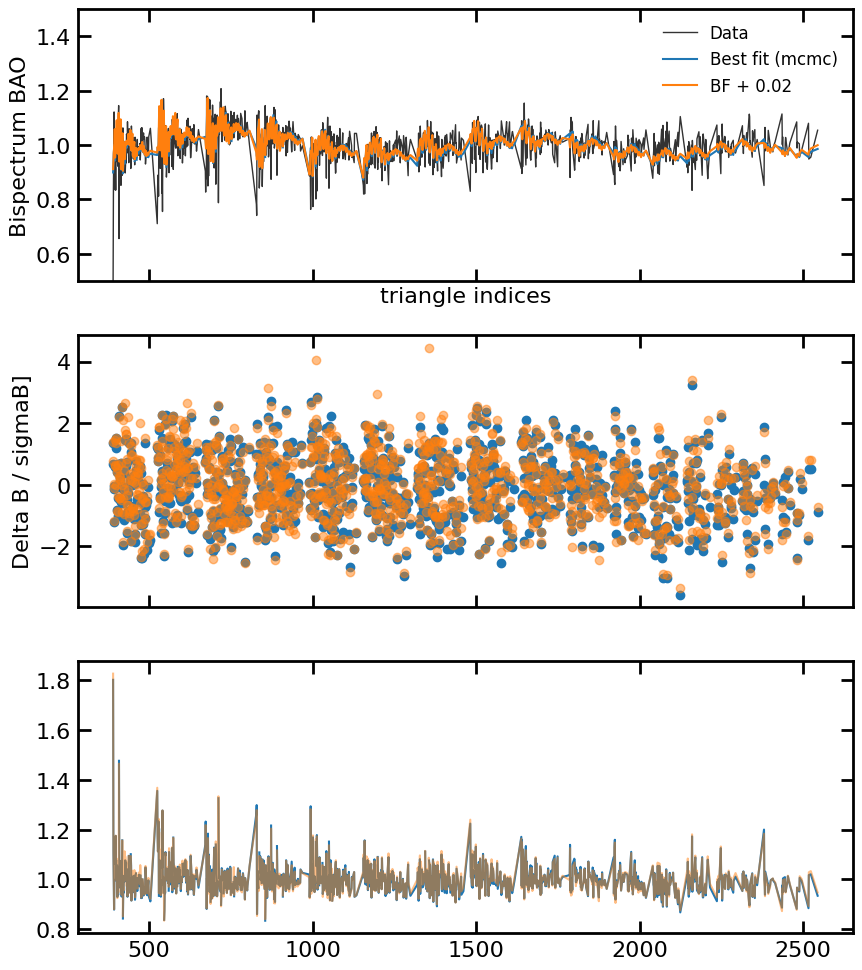

In [33]:
fg, ax = plt.subplots(nrows=3, figsize=(10, 12), sharex=True)

ax[0].plot(indices, ps.r_obs, alpha=0.8, label='Data', lw=1, color='k')
ax[0].plot(indices, ps.r_t(ps.k_obs, bf), label='Best fit (mcmc)')
ax[0].plot(indices, ps.r_t(ps.k_obs, bf_new), label='BF + 0.02')


#ax[0].plot(indices, ps.r_obs-, alpha=0.8, label='Data', lw=1, color='k')
ax[1].scatter(indices, (ps.r_t(ps.k_obs, bf)-ps.r_obs)/drcov, label='Best fit (mcmc)', color='C0')
ax[1].scatter(indices, (ps.r_t(ps.k_obs, bf_new)-ps.r_obs)/drcov, label='BF + 0.02', color='C1', alpha=0.5)
ax[1].set_ylabel('Delta B / sigmaB]')

#ax[0].plot(indices, ps.r_obs-, alpha=0.8, label='Data', lw=1, color='k')
ax[2].plot(indices, ps.r_t(ps.k_obs, bf)/ps.r_obs, label='Best fit (mcmc)', color='C0')
ax[2].plot(indices, ps.r_t(ps.k_obs, bf_new)/ps.r_obs, label='BF + 0.02', color='C1', alpha=0.5)


ax[0].set_ylim(0.5, 1.5)
ax[0].legend()
ax[0].set_ylabel('Bispectrum BAO')
ax[0].set_xlabel('triangle indices')

In [ ]:
lrg_true = extract_all('LRGz0', 'True')

In [28]:
lrg_false = extract_all('LRGz0', 'False')

In [60]:
means1 = []
means2 = []
std1 = []
std2 = []

for i in [5,]:
    d = np.load(f'/Users/mehdi/data/bispectrum/desi/mcmc_pk_raw_LRGz0_mock{i}_none_p1_p5_1k_False.npz', allow_pickle=True)
    c2 = d['samples'][4]['chain'][300:, :, 0].flatten()
    c1 = d['samples'][0]['chain'][300:, :, 0].flatten()
    
    means1.append(np.mean(c1))
    means2.append(np.mean(c2))
    std1.append(np.std(c1))
    std2.append(np.std(c2))

Text(0, 0.5, '$\\alpha$ + constant')

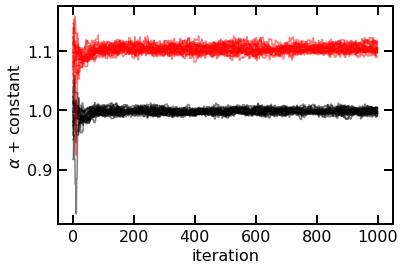

In [61]:
plt.plot(d['samples'][4]['chain'][:, :, 0], color='k', alpha=0.5)
_ = plt.plot(d['samples'][0]['chain'][:, :, 0]+0.1, color='r', alpha=0.5)
plt.xlabel('iteration')
plt.ylabel(r'$\alpha$ + constant')

In [50]:
means1, means2

([0.9528927029739532], [0.9612904926673523])

In [55]:
std1, std2

([0.004252586473980981, 0.004425641070256934, 0.00433231165507356],
 [0.0026677628042400064, 0.006783632994342, 0.0045867331929025056])

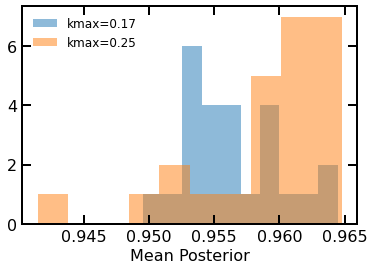

In [43]:
plt.hist(means1, alpha=0.5, label='kmax=0.17')
plt.hist(means2, alpha=0.5, label='kmax=0.25')
plt.xlabel('Mean Posterior')
plt.legend()

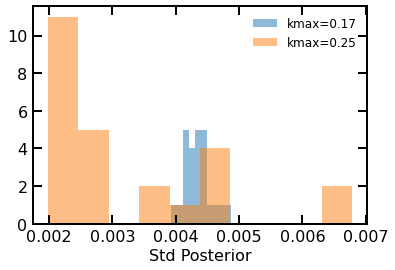

In [44]:
plt.hist(std1, alpha=0.5, label='kmax=0.17')
plt.hist(std2, alpha=0.5, label='kmax=0.25')
plt.xlabel('Std Posterior')
plt.legend()

In [56]:
np.argwhere(np.array(std2) > 0.006)

array([[1]])

In [45]:
np.std(means1), np.std(means2)

(0.0036606772658616168, 0.00547943341052006)

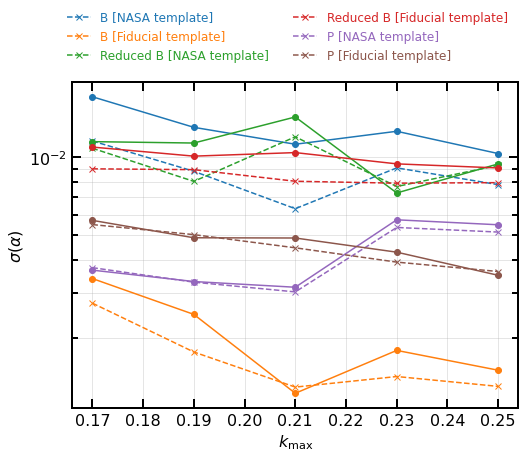

In [40]:
plt.figure(figsize=(8, 6))
for k,v in lrg_true.items():
    
    ln, = plt.plot([0.17, .19, .21, .23, .25], np.std(lrg_true[k], axis=0), label=decode(k), ls='--', marker='x')
    plt.plot([0.17, .19, .21, .23, .25], np.std(lrg_false[k], axis=0), color=ln.get_color(), ls='-', marker='o')
    
lgn = plt.legend(ncol=2, bbox_to_anchor=(1., 1.25))
plt.ylabel(r'$\sigma (\alpha)$')
plt.xlabel(r'$k_{\rm max}$')
plt.yscale('log')
plt.grid(which='both', alpha=0.4)

for i,txt in enumerate(lgn.get_texts()):
    txt.set_color('C%i'%i)
plt.savefig('sigma_kmax.png', dpi=300, bbox_inches='tight')

In [15]:
for t in ['LRGz0', 'ELGz1', 'QSOz2']:
    bk = src.utils.get_bispectra(t)
    np.savetxt(f'bispectra_{t}.txt', np.column_stack([bk.k, bk.b.mean(axis=0), bk.b_smooth.mean(axis=0)]),
               fmt='%.3f %.3f %.3f %.18e %.18e', header='k1 k2 k3 mean_bk mean_bk_smooth')

tracer: LRGz0
tracer: ELGz1
tracer: QSOz2


In [19]:
for t in ['LRGz0', 'ELGz1', 'QSOz2']:
    pk = src.utils.get_powerspectra(t)
    np.savetxt(f'powerspectra_{t}.txt', np.column_stack([pk.k, pk.p.mean(axis=0), pk.p_smooth.mean(axis=0)]),
               fmt='%.3f %.18e %.18e', header='k mean_pk mean_pk_smooth')

tracer: LRGz0
tracer: ELGz1
tracer: QSOz2


In [16]:
pk = src.utils.get_powerspectra(t)

tracer: QSOz2


In [18]:
pk.p.shape, pk.p_smooth

(25, 30)

In [14]:
!head test.txt

# k1 k2 k3 mean_bk mean_bk_smooth
0.005 0.005 0.005 -6.372354114369756280e+04 2.720578274282085476e+05
0.005 0.015 0.015 1.424734502469829749e+05 4.194228974070471013e+05
0.005 0.025 0.025 4.600275204202454770e+05 3.678722980873632478e+05
0.005 0.035 0.035 3.556197513310028007e+05 2.966965396427281084e+05
0.005 0.045 0.045 2.647463243726916844e+05 2.375575484923085605e+05
0.005 0.055 0.055 1.943481993910978781e+05 1.924225632827968802e+05
0.005 0.065 0.065 2.000075100434323540e+05 1.583833832690825220e+05
0.005 0.075 0.075 1.636418871331066766e+05 1.324919009222915338e+05
0.005 0.085 0.085 1.515310252189739840e+05 1.125061083877297351e+05


In [8]:
bk.b.mean(axis=0)

(25, 2600)

(25, 2600)

In [53]:
ls /Users/mehdi/data/bispectrum/desi/mcmc_*mock0*p1_p5*

/Users/mehdi/data/bispectrum/desi/mcmc_bk_all_LRGz0_mock0_lado_p1_p5_1k_False.npz
/Users/mehdi/data/bispectrum/desi/mcmc_bk_all_LRGz0_mock0_lado_p1_p5_1k_True.npz
/Users/mehdi/data/bispectrum/desi/mcmc_bk_all_LRGz0_mock0_none_p1_p5_1k_False.npz
/Users/mehdi/data/bispectrum/desi/mcmc_bk_all_LRGz0_mock0_none_p1_p5_1k_True.npz
/Users/mehdi/data/bispectrum/desi/mcmc_bk_raw_LRGz0_mock0_lado_p1_p5_1k_False.npz
/Users/mehdi/data/bispectrum/desi/mcmc_bk_raw_LRGz0_mock0_lado_p1_p5_1k_True.npz
/Users/mehdi/data/bispectrum/desi/mcmc_bk_raw_LRGz0_mock0_none_p1_p5_1k_False.npz
/Users/mehdi/data/bispectrum/desi/mcmc_bk_raw_LRGz0_mock0_none_p1_p5_1k_True.npz
/Users/mehdi/data/bispectrum/desi/mcmc_pk_raw_LRGz0_mock0_lado_p1_p5_1k_False.npz
/Users/mehdi/data/bispectrum/desi/mcmc_pk_raw_LRGz0_mock0_lado_p1_p5_1k_True.npz
/Users/mehdi/data/bispectrum/desi/mcmc_pk_raw_LRGz0_mock0_none_p1_p5_1k_False.npz
/Users/mehdi/data/bispectrum/desi/mcmc_pk_raw_LRGz0_mock0_none_p1_p5_1k_True.npz


## Plot spectra, ratio, correlation, and covariances

tracer: LRGz0
tracer: ELGz1
tracer: QSOz2
tracer: LRGz0
tracer: ELGz1
tracer: QSOz2
[0.01150136 1.        ]
[-0.05026853  1.        ]
[-0.054138  1.      ]
[nan nan]


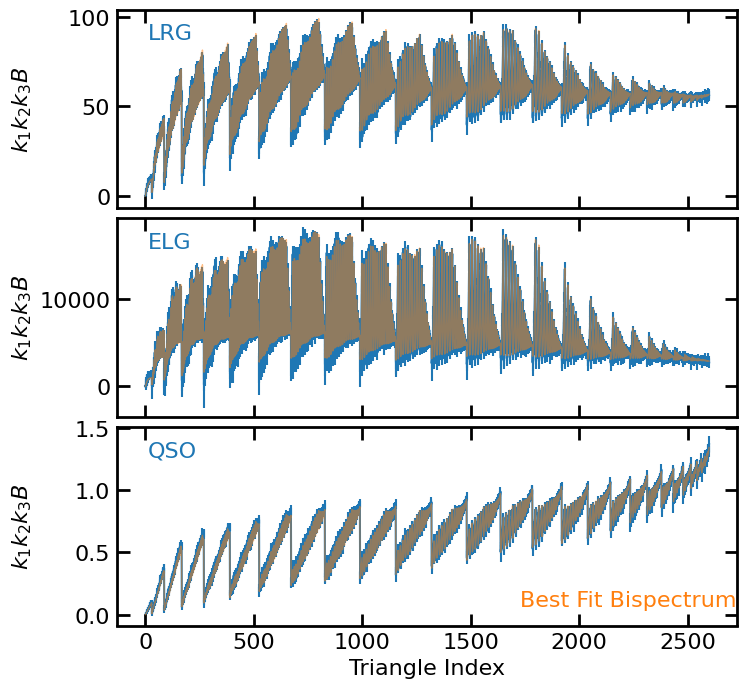

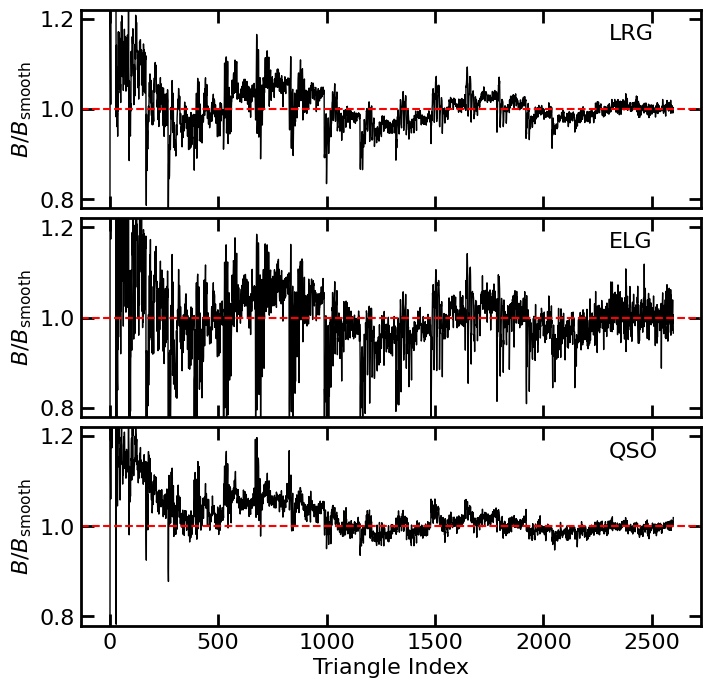

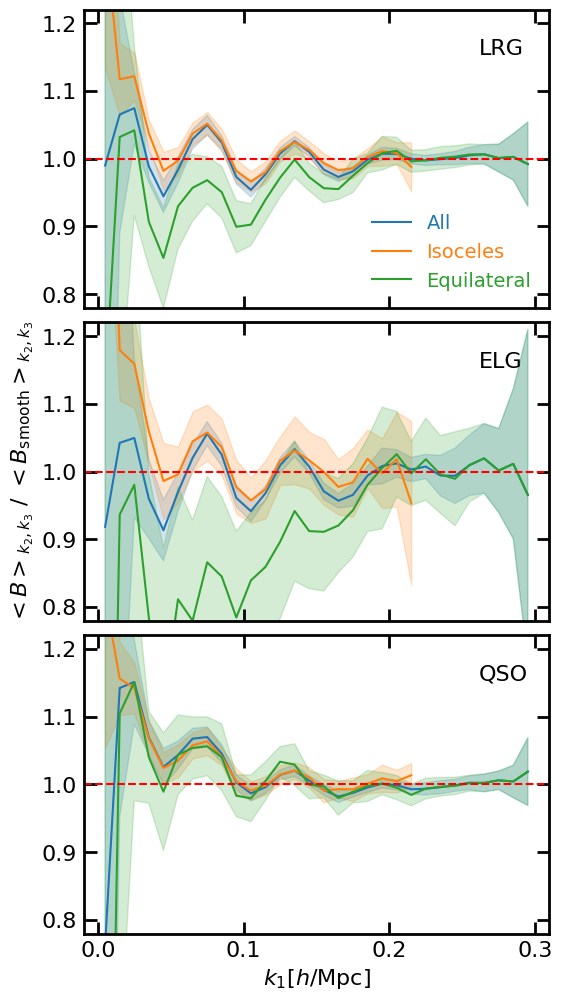

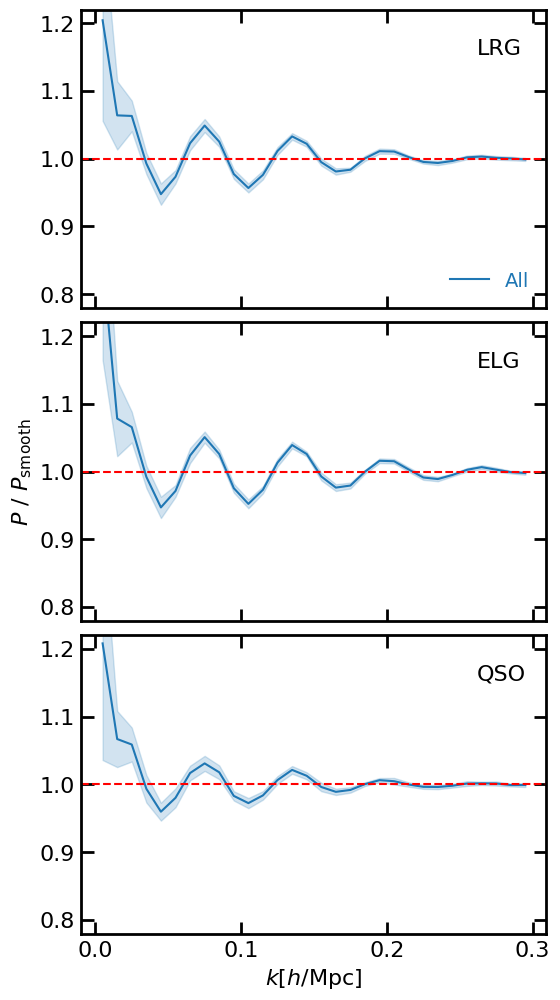

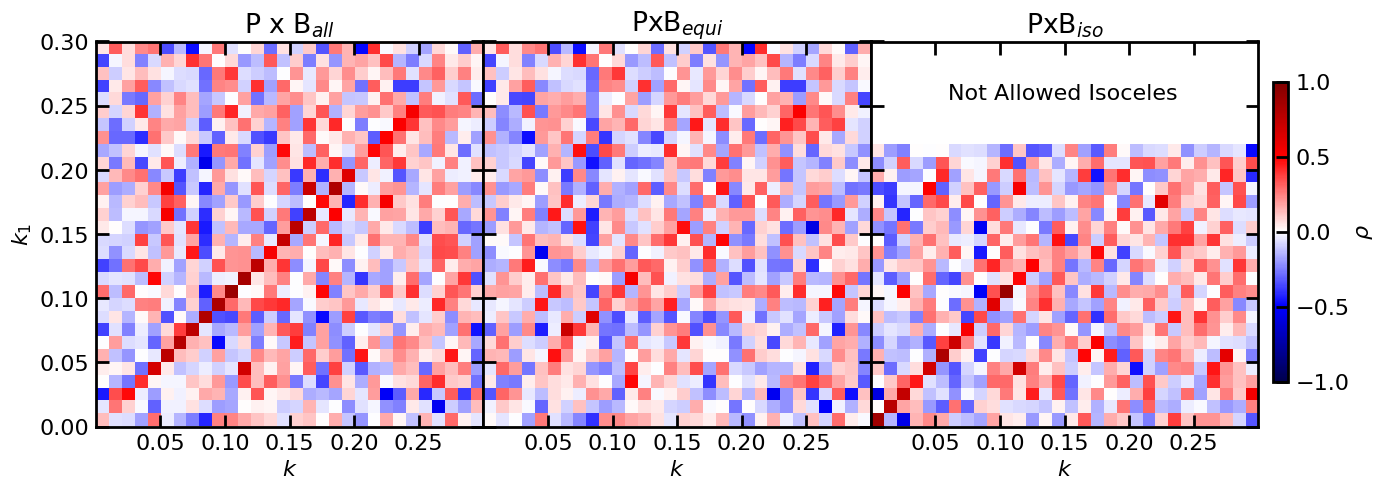

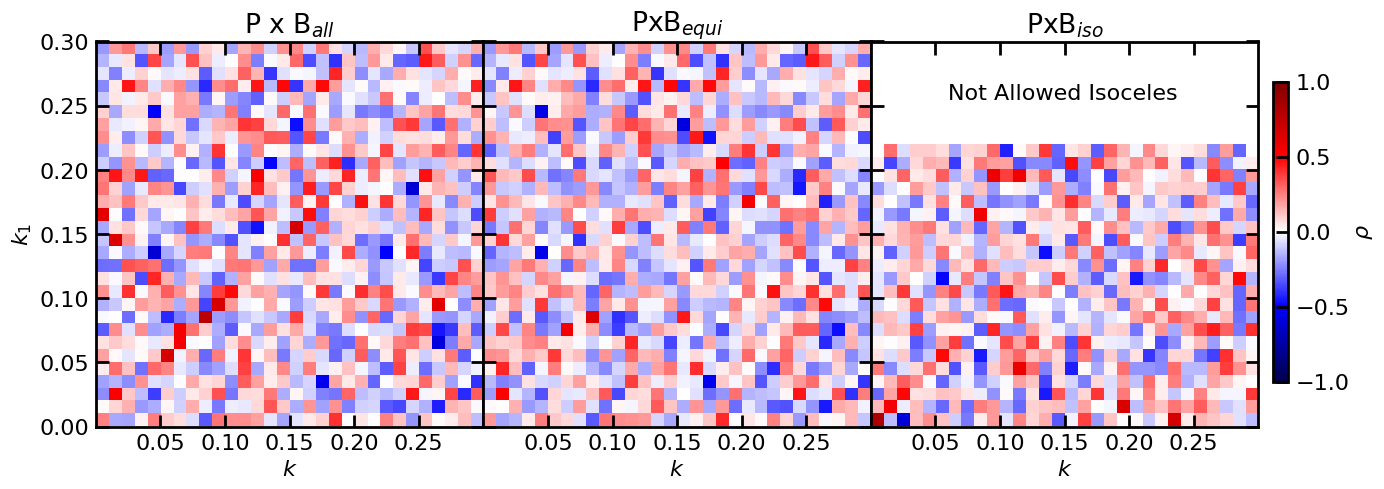

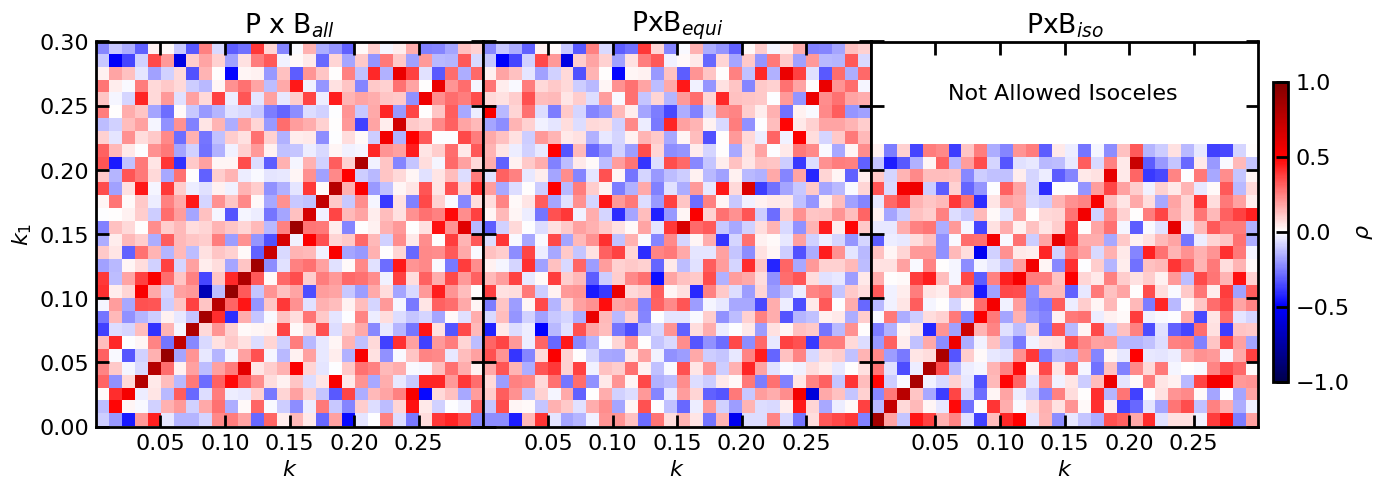

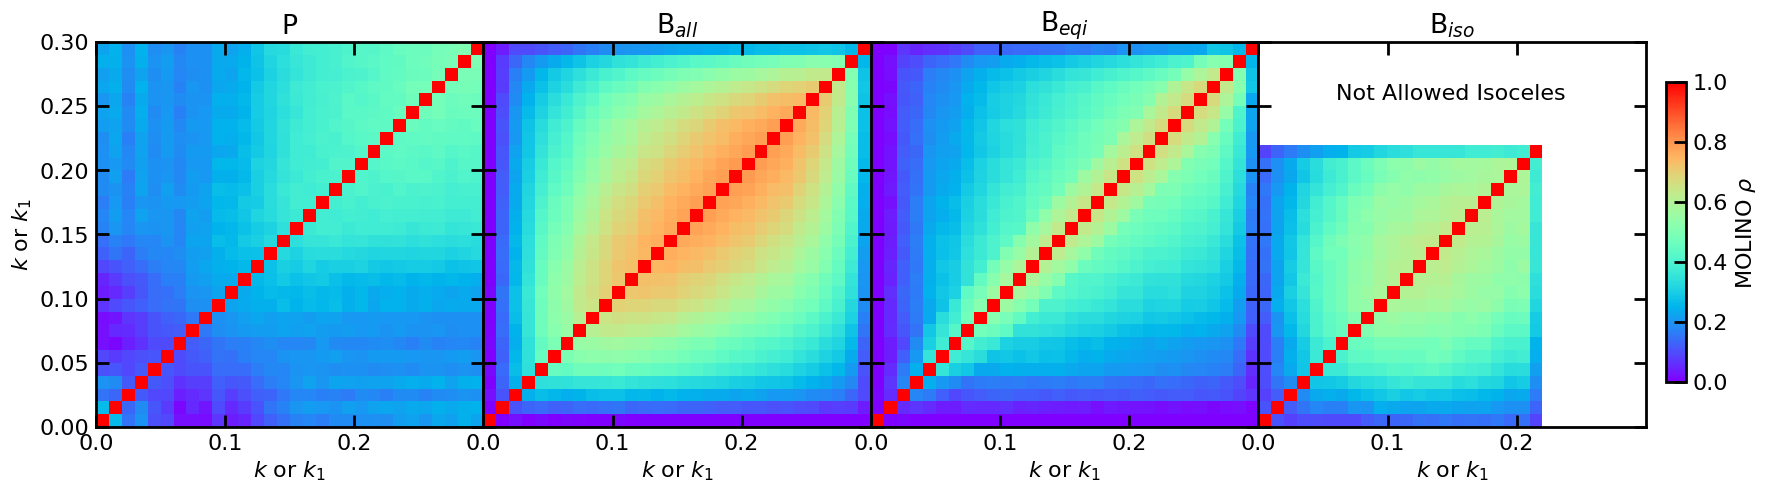

In [6]:
src.plots.plot_data()

## MCMC

## plots MLE and sigma alpha

In [4]:
t = 'LRGZ0'

class MCMC:
    def __init__(self):
        self.means = []
        self.stds = []
    
    def update(self, mean, std):
        self.means.append(mean)
        self.stds.append(std)


def extract(bks_files):
    mc = MCMC()
    for bk_i in bks_files:
        d = np.load(bk_i, allow_pickle=True)
        alphas = d['samples'][0]['chain'][300:, :, 0].flatten()
        mc.update(np.mean(alphas), np.std(alphas))
    return mc

def extract_all(t, c):
    p= '/Users/mehdi/data/bispectrum/desi/'
    
    a = {}
    
    a['brl'] = extract([f'{p}mcmc_bk_raw_{t}_mock{i}_lado_p1_p2_1k_{c}.npz' for i in range(25)])    
    a['brn']  = extract([f'{p}mcmc_bk_raw_{t}_mock{i}_none_p1_p2_1k_{c}.npz'  for i in range(25)])    
    a['bal'] = extract([f'{p}mcmc_bk_all_{t}_mock{i}_lado_p1_p2_1k_{c}.npz' for i in range(25)])
    a['ban'] = extract([f'{p}mcmc_bk_all_{t}_mock{i}_none_p1_p2_1k_{c}.npz' for i in range(25)])
    
    a['prl'] = extract([f'{p}mcmc_pk_raw_{t}_mock{i}_lado_p1_p2_1k_{c}.npz' for i in range(25)])
    a['prn'] = extract([f'{p}mcmc_pk_raw_{t}_mock{i}_none_p1_p2_1k_{c}.npz' for i in range(25)])  
    
    return a

    

# def make_plots(t):

#     fig, ax = plt.subplots(ncols=3, figsize=(12, 3), sharey=True)
#     fig.subplots_adjust(wspace=0.02)
#     for i, (n, v) in enumerate(alphas_l.items()):
#         if i<2:
#             kw = dict(bins=np.linspace(0.93, 1.02, 30))
#         else:
#             kw = dict(bins=np.linspace(0.0, 0.02, 30))

#         ax[i].hist(alphas_n[n], alpha=0.8, label='Bispectrum', **kw)
#         ax[i].hist(alphas_p[n], alpha=0.8, label='PowerSpectrum', **kw)
#         ax[i].hist(alphas_r[n], alpha=0.8, label='Unreduced Bispectrum', **kw)
#         ax[i].hist(v, alpha=0.8, label='Bispectrum [Lado temp]', **kw)    
#         ax[i].hist(alphas_pl[n], alpha=0.8, label='PowerSpectrum [Lado temp]', **kw)
#         ax[i].hist(alphas_rl[n], alpha=0.8, label='Unreduced Bispectrum [Lado temp]', **kw)
#         ax[i].set_xlabel(fr'{n} $\alpha$')
#     lgnd = ax[2].legend(ncol=3, bbox_to_anchor=(0.8, 1.35))
#     for i, txt in enumerate(lgnd.get_texts()):txt.set_color('C%d'%i)
#     print("mean mock as template", np.std(alphas_n['mean']))
#     print("lado's template", np.std(alphas_l['mean']))
#     print("mean mocks as template", np.std(alphas_p['mean']))
#     fig.savefig(f'../bisp4desi/figures/constraints_{t}.pdf', bbox_inches='tight')    

#     n = 'mean'
#     kw = dict(alpha=0.8)
#     fg, ax = plt.subplots()
#     ax.scatter(alphas_p[n], alphas_n[n],  label='Bispectrum', **kw)
#     ax.scatter(alphas_p[n], alphas_p[n],  label='PowerSpectrum', **kw)
#     ax.scatter(alphas_p[n], alphas_r[n],  label='Unreduced Bispectrum', **kw)
#     ax.scatter(alphas_p[n], alphas_l[n],  label='Bispectrum [Lado temp]', **kw)
#     ax.scatter(alphas_p[n], alphas_pl[n], label='PowerSpectrum [Lado temp]', **kw)
#     ax.scatter(alphas_p[n], alphas_rl[n], label='Unreduced Bispectrum [Lado temp]', **kw)
#     ax.plot([0.98, 1.02], [0.98, 1.02])
#     ax.set(xlabel=r'Power Spectrum $\alpha$', ylabel=r'XXXX $\alpha$')
#     lgn=ax.legend(bbox_to_anchor=(1.1, 1.4), ncol=2, title='XXXX')
#     for i,txt in enumerate(lgn.get_texts()):txt.set_color('C%d'%i)
#     fg.savefig(f'../bisp4desi/figures/constraints_scatter_{t}.pdf', bbox_inches='tight')    

In [9]:
import pandas as pd

In [38]:
full.keys()

dict_keys(['brl', 'brn', 'bal', 'ban', 'prl', 'prn'])

In [39]:
for t in ['LRGz0', 'ELGz1', 'QSOz2']:
    print(t)
    diag = extract_all(t, 'True')
    full = extract_all(t, 'False')

    for n, v in full.items():
        tm = 'fiducial' if 'n' in n else 'NASA'
        
        print(f'%30s & %10s & full & %.3f & %.3f& %.3f & %.3f\\\ '%(decode(n), tm, np.mean(v.means), np.std(v.means), *np.percentile(v.stds, [4, 96])))
        v = diag[n]
        print(f' & %10s & diagonal & %.3f & %.3f &%.3f &%.3f\\\ '%(tm, np.mean(v.means), np.std(v.means), *np.percentile(v.stds, [4, 96])))    
        print('\hline')
        
    print(2*'\n')

LRGz0
                            B  &       NASA & full & 0.957 & 0.010& 0.005 & 0.010\\ 
 &       NASA & diagonal & 0.954 & 0.008 &0.003 &0.007\\ 
\hline
                            B  &   fiducial & full & 0.998 & 0.002& 0.001 & 0.002\\ 
 &   fiducial & diagonal & 0.997 & 0.001 &0.001 &0.003\\ 
\hline
                    Reduced B  &       NASA & full & 0.961 & 0.009& 0.005 & 0.012\\ 
 &       NASA & diagonal & 0.958 & 0.009 &0.007 &0.013\\ 
\hline
                    Reduced B  &   fiducial & full & 1.002 & 0.009& 0.004 & 0.008\\ 
 &   fiducial & diagonal & 1.002 & 0.008 &0.008 &0.013\\ 
\hline
                            P  &       NASA & full & 0.959 & 0.005& 0.002 & 0.006\\ 
 &       NASA & diagonal & 0.958 & 0.005 &0.003 &0.006\\ 
\hline
                            P  &   fiducial & full & 1.000 & 0.003& 0.004 & 0.005\\ 
 &   fiducial & diagonal & 1.001 & 0.004 &0.004 &0.006\\ 
\hline



ELGz1
                            B  &       NASA & full & 0.961 & 0.018& 0.007 & 0.014\\ 


mean mock as template 0.009080315287571875
lado's template 0.00941412859947065
mean mocks as template 0.0034964626541648014


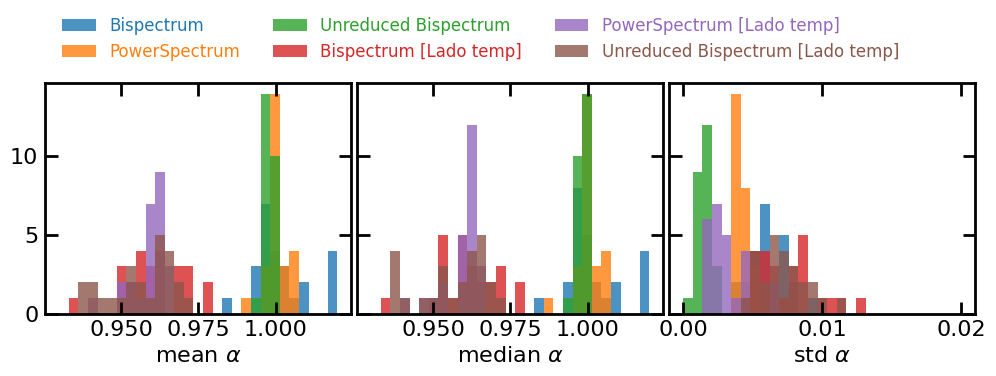

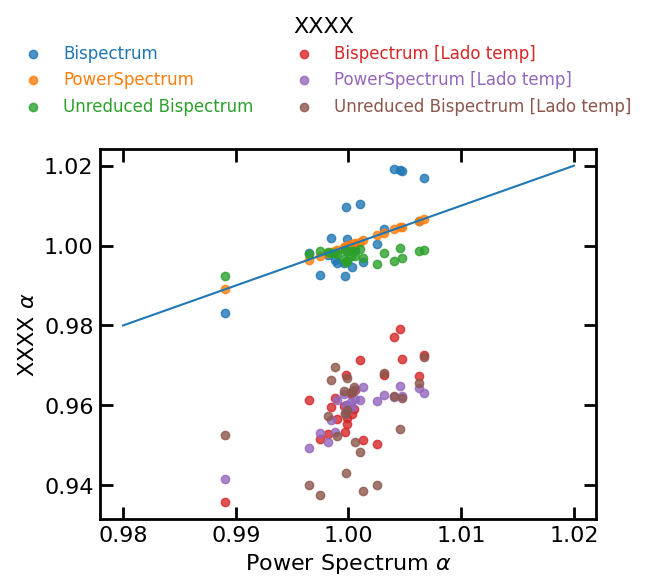

In [29]:
make_plots('LRGz0')

mean mock as template 0.010759668432591562
lado's template 0.013538996395699
mean mocks as template 0.003024288094330945


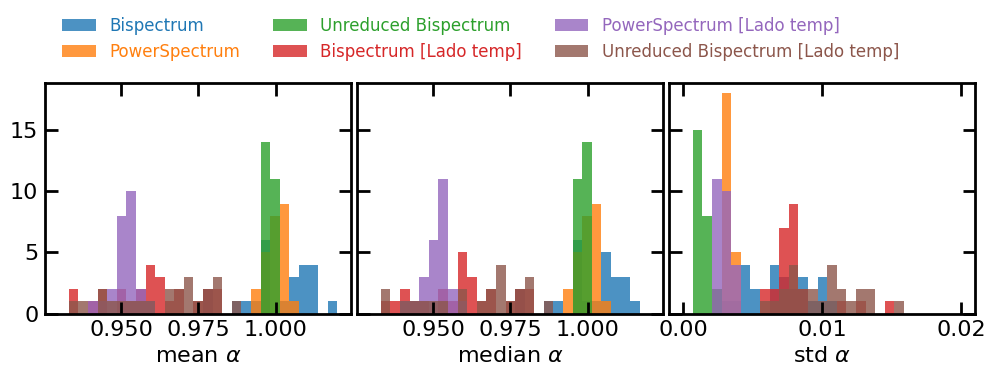

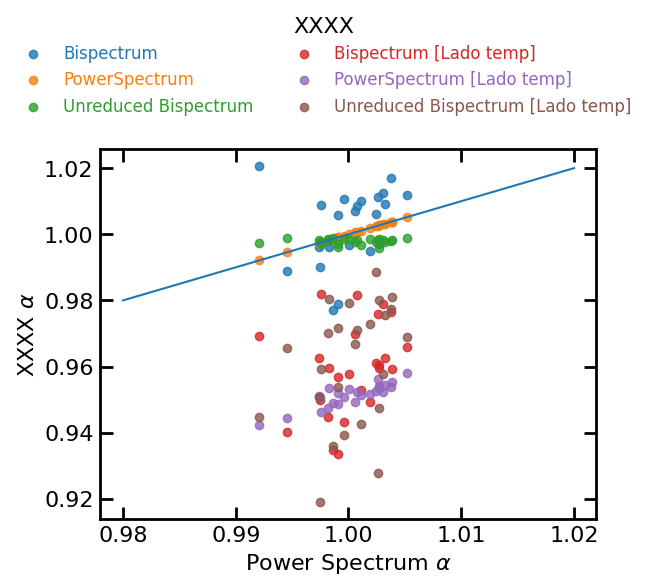

In [30]:
make_plots('ELGz1')

mean mock as template 0.01661826593643901
lado's template 0.012140043337154021
mean mocks as template 0.008372367560408602


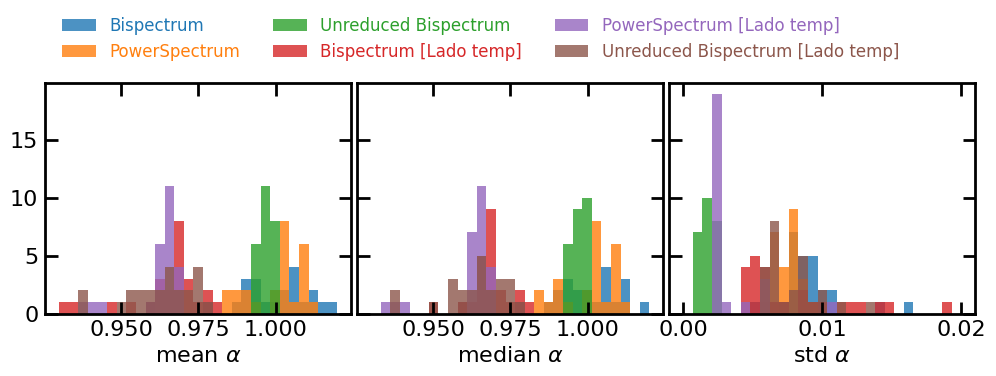

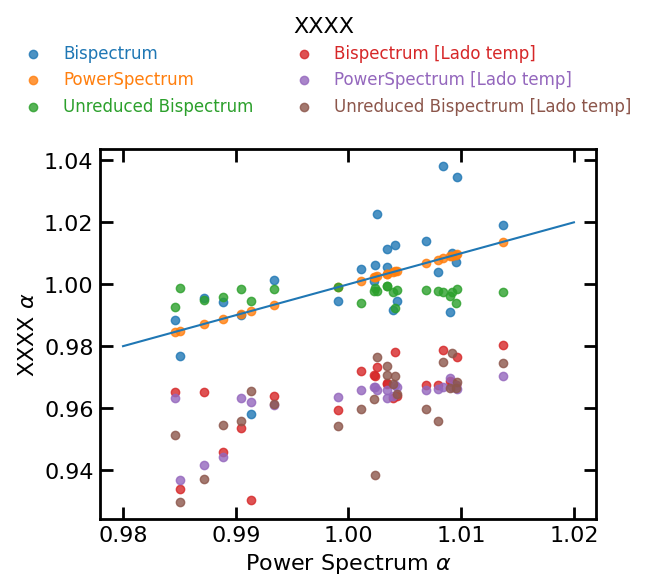

In [33]:
make_plots('QSOz2')

In [196]:
d = np.load('/Users/mehdi/data/bispectrum/desi/mcmc_bk_raw_LRGz0_mock0_none_p1_p2_1k_False.npz', allow_pickle=True)

In [197]:
d.files

['samples', 'kranges']

In [201]:
d['samples'][0]['chain'].shape

(1000, 22, 11)

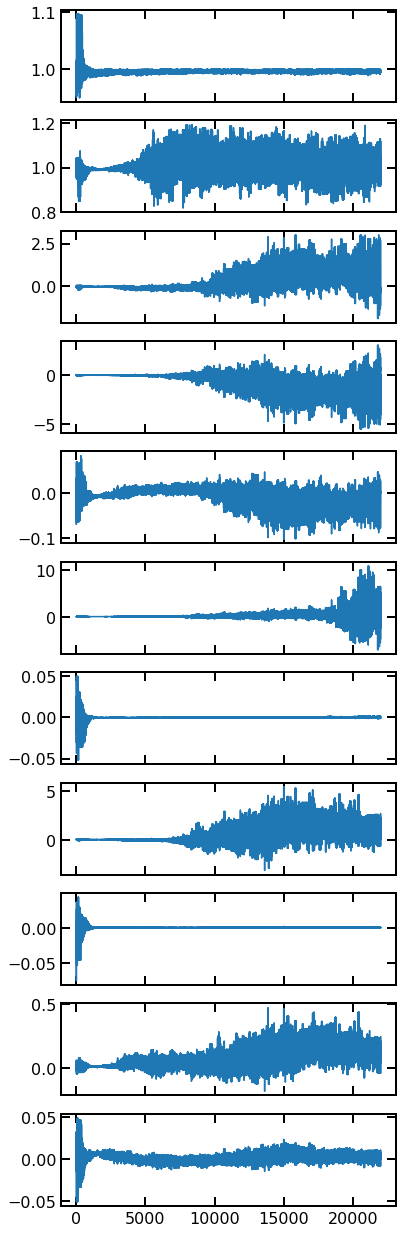

In [205]:
chains = d['samples'][0]['chain'].reshape(-1, 11)

fg, ax = plt.subplots(nrows=11, figsize=(6, 22), sharex=True)
for i in range(11):
    ax[i].plot(chains[:, i])

# 

In [46]:
def get_walpha(alpha_b, alpha_p):
    w_b = 1./np.var(alpha_b)
    w_p = 1./np.var(alpha_p)
    return (alpha_b*w_b + alpha_p*w_p)/(w_b+w_p)

In [5]:
(k_obs, r_obs, r_cov), (k_tem, r_tem) = src.utils.load_data('LRGz0', 'pk', 'raw', 'lado')

LRGz0 pk raw lado
tracer: LRGz0


In [6]:
k_obs.shape, r_obs.shape

((30,), (25, 30))

In [7]:
ps = src.utils.PowPosterior()

In [8]:
ps.add_data(k_obs, r_obs[0, :], r_cov)

data is added


In [9]:
ps.add_template(k_tem, r_tem)

In [10]:
ps.select_krange()

data is cut based on k


In [47]:
r_m = ps.r_t(ps.k_t, [1.0, 1.0]+5*[0.0,])

(0.8, 1.2)

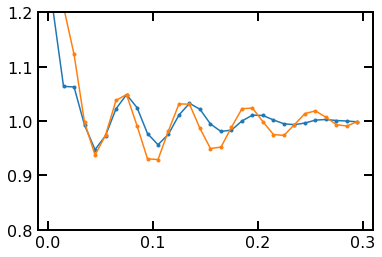

In [50]:
plt.plot(k_obs, r_obs.mean(axis=0), marker='.')
plt.plot(ps.k_t, r_m, marker='.')
plt.ylim(0.8, 1.2)

In [28]:
import camb

In [29]:
from camb import model, initialpower

In [42]:
k_obs.size

30

In [159]:
#Now get matter power spectra and sigma8 at redshift 0 and 0.8
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, )

pars.InitPower.set_params(ns=0.965)
#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0.0], kmax=2.0)

#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)

In [175]:
PK = results.get_matter_power_interpolator(k_hunit=True)

In [165]:
k = np.linspace(0.005, 0.295, 30)

In [188]:
k = np.logspace(-3, 0, 200)

In [167]:
pk_abacus = src.utils.get_powerspectra('LRGz0')

tracer: LRGz0


Text(0, 0.5, 'P [Mpc/h]^3')

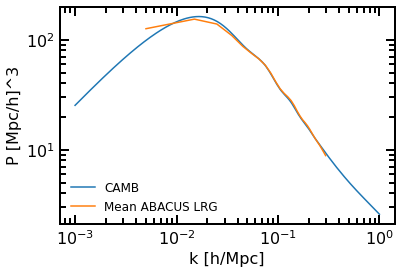

In [189]:
plt.plot(k, PK.P(0.0, k)/1.42e2, label='CAMB')
plt.loglog(pk_abacus.k, pk_abacus.p.mean(axis=0), label='Mean ABACUS LRG')
plt.legend()
plt.xlabel('k [h/Mpc]')
plt.ylabel('P [Mpc/h]^3')

In [192]:
np.savetxt('Pk_camb_log.txt', np.column_stack([k, PK.P(0.0, k)/1.42e2]))

In [172]:
np.savetxt('Pk_camb.txt', PK.P(0.0, k)/1.42e2)

In [24]:
ps = src.utils.RedBisPosterior()
ps.add_data(k_obs, r_obs[0, :], r_cov)
ps.add_template(k_tem, r_tem) 
ps.select_krange(kmin=0.004, kmax=0.31)

data is added
interpolation done
data is cut based on k


In [25]:
r_tem.shape

(2600,)

/lhome/mr095415/linux/.local/lib/python3.10/site-packages/scipy/stats/_binned_statistic.py:694: RuntimeWarning: Mean of empty slice
  stat = stat_func(np.array(bin_map[i]))


(0.8, 1.2)

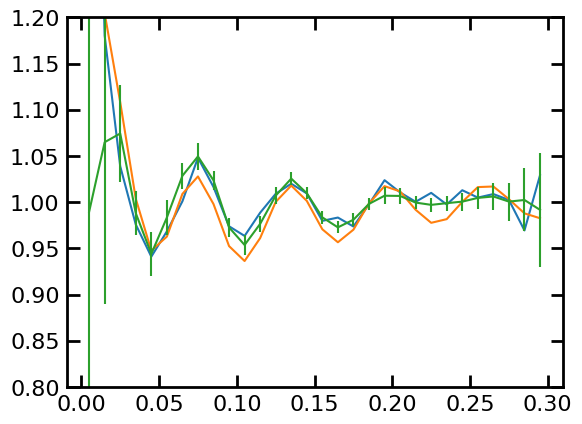

In [28]:
r_m = ps.r_t(ps.k_t, [0.96, 1.0]+9*[0.0,])
k_bin, r_m_bin = src.utils.bin_bispectrum(ps.k_t, r_m)
k_bin = k_bin[ps.is_g]
r_m_bin = r_m_bin[ps.is_g]

plt.plot(k_obs, r_obs[0, :])
plt.plot(k_bin, r_m_bin)
plt.errorbar(k_obs, r_obs.mean(axis=0), yerr=np.diagonal(r_cov)**0.5)
plt.ylim(0.8, 1.2)

In [52]:
lado_temp = np.loadtxt('/localdata/commondata/BK_bao_only.txt').T

In [53]:
lado_temp.shape

(2600, 4)

In [73]:
rps = src.models.DecayedBiSpectrum(lado_temp[:, :3], lado_temp[:, 3])

interpolation done


In [80]:
rps_values = rps(lado_temp[:, :3], [1., 1.,]+9*[0.0,], sigma=-7.0)
k_bin, r_bin  = src.utils.bin_bispectrum(lado_temp[:, :3], lado_temp[:, 3])
__, r_bin_decayed = src.utils.bin_bispectrum(lado_temp[:, :3], rps_values)

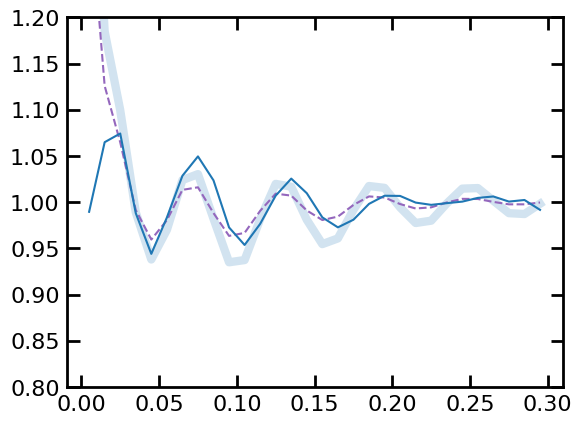

In [81]:
plt.plot(k_bin, r_bin, 'C0', lw=6, alpha=0.2)
plt.plot(k_bin, r_bin_decayed, 'C4--')
plt.ylim(0.8, 1.2)
plt.plot(k_bin, r_obs.mean(axis=0))

In [4]:
import src

In [72]:
tracer = 'LRGz0'
stat = 'bk'
reduced = 'all'
nmocks = 25
kmax_range = [0.14, 0.16, 0.18, 0.20]
kmin = 0.1

(k_obs, r_obs, r_cov), (k_tem, r_tem) = src.utils.load_data(tracer, stat, reduced, 'none')

tracer: LRGz0


In [73]:
k_obs.shape, r_obs.shape, r_cov.shape, k_tem.shape, r_tem.shape

((30,), (25, 30), (30, 30), (2600, 3), (2600,))

In [77]:
ps = src.utils.RedBisPosterior()
ps.add_data(k_obs, r_obs[i, :], r_cov)
ps.add_template(k_tem, r_tem)
ps.select_krange(kmin=0.024, kmax=0.2)
ps.loglike([1.02, 1.0, ]+9*[0.0,])

data is added
interpolation done
data is cut based on k


/lhome/mr095415/linux/.local/lib/python3.10/site-packages/scipy/stats/_binned_statistic.py:694: RuntimeWarning: Mean of empty slice
  stat = stat_func(np.array(bin_map[i]))


-9.284927297708116

In [71]:
np.nanmean(np.array([]))

/tmp/ipykernel_2995484/891292965.py:1: RuntimeWarning: Mean of empty slice
  np.nanmean(np.array([]))


nan

In [42]:
ps.k_obs_[29]

0.295

In [7]:
i = 13 # mock -8013
r_obs = rbin_all[i]
sp = src.models.BiSpectrum(k, r.mean(axis=0)) # mean of 25 realization as the model 

In [75]:
def loglike(p, kmin=0.00, kmax=0.4):  
    r_model = sp(k, p)
    is_finite = np.isfinite(r_model)  
    if is_finite.sum()==0:
        return -np.inf
    
    k_bin, r_model_bin = src.utils.bin_bispectrum(k[is_finite], r_model[is_finite])
    k_ix = ((k_bin - k.min()+1.0e-8)/0.01).astype('int')
    residual = (r_model_bin - r_obs[k_ix])
    
    is_good = (k_bin > kmin) & (k_bin < kmax)
    chi2 = ((residual/rvar_all[k_ix])**2)[is_good]
    is_finite = ~np.isnan(chi2)
    if is_finite.sum()==0:
        return -np.inf
                
    return -0.5*chi2[is_finite].sum()

def logprior(p):
    lp = 0.
    lp += 0. if  0.8 < p[0] < 1.2 else -np.inf
    lp += 0. if  0.5 < p[1] < 2.0 else -np.inf    
    for p_i in p[2:]:
        lp += 0. if  -100. < p_i < 100. else -np.inf
    return lp    

def logpost(p, kmin=0.00, kmax=0.4):
    return loglike(p, kmin=kmin, kmax=kmax) + logprior(p)

In [87]:
from scipy.optimize import minimize

In [90]:
start.shape

(22, 11)

In [104]:
def nlogpost(p, kmin, kmax):
    return -1*logpost(p, kmin, kmax)

In [105]:
res = minimize(nlogpost, start[2], args=(0.04, 0.25))

/Users/mehdi/miniconda3/envs/sysnet/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/mehdi/miniconda3/envs/sysnet/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/mehdi/miniconda3/envs/sysnet/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [106]:
res.x # from optimization

array([ 1.01078731e+00,  1.02948644e+00, -5.86273424e+00,  9.03658933e+00,
        3.14273338e-01, -1.04445789e+01,  5.39183681e-03,  2.62919791e+00,
       -2.14058231e-02, -2.88717461e+00, -2.23384490e-02])

In [107]:
start[2] # initial guess

array([ 0.84448608,  1.07264313,  0.12622236,  0.04941727,  0.06532435,
        0.06211021,  0.11285517, -0.02969583,  0.12713781,  0.033162  ,
       -0.01385321])

In [108]:
nwalkers = 22
ndim    = 11
nsteps = 1000
cov = 0.001*np.eye(11)
start = np.random.multivariate_normal(res.x, cov, size=nwalkers)

n = 4
with Pool(n) as pool:    
    sampler = emcee.EnsembleSampler(nwalkers, ndim, logpost, args=(0.04, 0.25), pool=pool)
    sampler.run_mcmc(start, nsteps, progress=True)
    
chain = sampler.get_chain()
_ = plt.hist(chain[200::10, :, 0].flatten()-1, bins=30, density=True)
plt.xlabel(r'$\alpha$-1')
plt.axvline(0, color='k')    

100%|███████████████████████████████████████| 1000/1000 [11:36<00:00,  1.44it/s]


In [110]:
chain.shape

(1000, 22, 11)

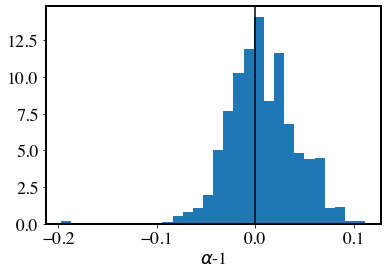

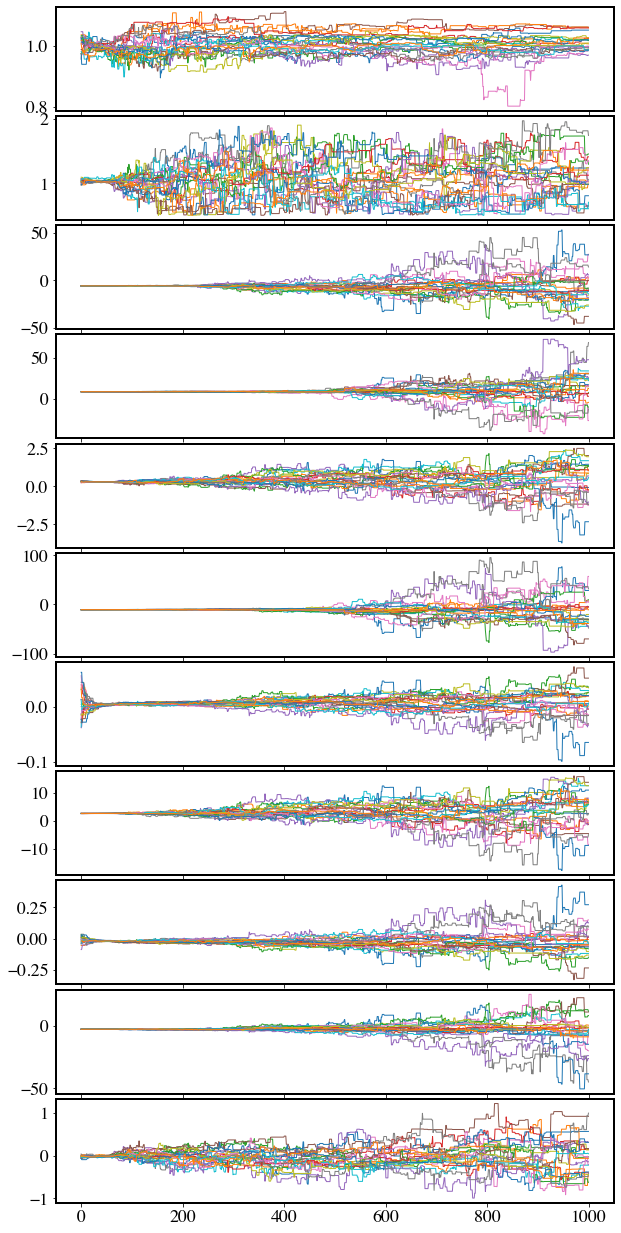

In [83]:
lk = []
lk1 = []
ps = np.linspace(0.96, 1.04, num=41)
for p in ps:
    lk.append(logpost([p, 1.04]+9*[0.0, ]))
    lk1.append(logpost([p, 1.04]+9*[0.0, ], kmin=0.04, kmax=0.25))

Text(0, 0.5, '$\\chi^{2}$')

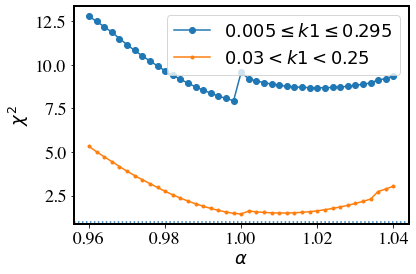

In [86]:
plt.plot(ps, -2*np.array(lk), marker='o', label=r'$0.005\leq k1 \leq 0.295$')
plt.plot(ps, -2*np.array(lk1), marker='.', label=r'$0.03<k1<0.25$')
plt.axhline(1, ls=':')
plt.legend()
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\chi^{2}$')

Text(0, 0.5, 'residual')

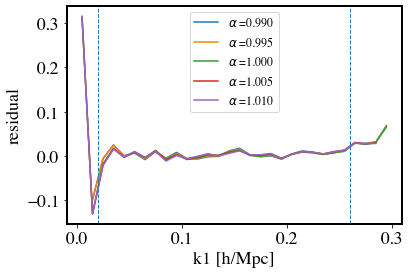

In [263]:
plt.figure()
# plt.errorbar(k_all, r_obs, yerr=rvar_all)

for a in [0.990, 0.995, 1.0, 1.005, 1.01]:
    r_model = sp(k, [a, 1.04]+9*[0.0, ])
    is_finite = np.isfinite(r_model)    
    k_bin, r_model_bin = src.utils.bin_bispectrum(k[is_finite], r_model[is_finite])
    k_ix = ((k_bin - k.min()+1.0e-8)/0.01).astype('int')
    residual = (r_model_bin - r_obs[k_ix])
    plt.plot(k_bin, residual, label=fr'$\alpha$ ={a:.3f}')
    
# plt.ylim(0., 1.2)
for x in [0.02, 0.26]:
    plt.axvline(x, ls='--', lw=1)
plt.legend(fontsize=12)
plt.xlabel('k1 [h/Mpc]')
plt.ylabel('residual')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'residual')

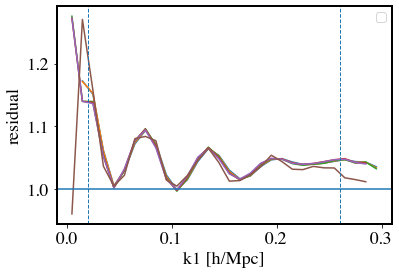

In [262]:
plt.figure()
# plt.errorbar(k_all, r_obs, yerr=rvar_all)

for a in [0.990, 0.995, 1.0, 1.005, 1.01]:
    r_model = sp(k, [a, 1.04]+9*[0.0, ])
    is_finite = np.isfinite(r_model)    
    k_bin, r_model_bin = src.utils.bin_bispectrum(k[is_finite], r_model[is_finite])
    k_ix = ((k_bin - k.min()+1.0e-8)/0.01).astype('int')
    #residual = (r_model_bin - r_obs[k_ix])
    #plt.plot(k_bin, residual, label=fr'$\alpha$ ={a:.3f}')
    plt.plot(k_bin, r_model_bin)
plt.plot(k_bin, r_obs[k_ix])
    
# plt.ylim(0., 1.2)
for x in [0.02, 0.26]:
    plt.axvline(x, ls='--', lw=1)
    
plt.axhline(1)
plt.legend(fontsize=12)
plt.xlabel('k1 [h/Mpc]')
plt.ylabel('residual')

In [226]:
r_obs.shape

(30,)

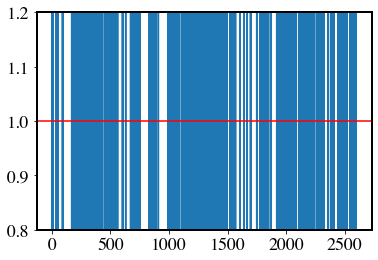

In [254]:
i = 8013
bk_smooth = np.loadtxt(f'/Users/mehdi/data/Abacus_smooth/all_bk_LRGz0_{i:d}.txt')
bk = np.loadtxt(f'/Users/mehdi/data/AbacusData/bk_LRGz0.{i:d}')        
plt.plot(bk[:, 3]-bk_smooth[:, 5])
plt.ylim(0.8, 1.2)
plt.axhline(1, color='r')

## Prepare data

In [6]:
k_all, rbin_all, rvar_all = src.utils.get_covariance(True)
k_iso, rbin_iso, rvar_iso = src.utils.get_covariance(True, which='iso')
k_equ, rbin_equ, rvar_equ = src.utils.get_covariance(True, which='equ')

[autoreload of src.utils failed: Traceback (most recent call last):
  File "/Users/mehdi/miniconda3/envs/sysnet/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/mehdi/miniconda3/envs/sysnet/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/mehdi/miniconda3/envs/sysnet/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/mehdi/miniconda3/envs/sysnet/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 839, in exec_module
  File "<frozen importlib._bootstrap_external>", line 976, in get_code
  File "<frozen importlib._bootstrap_external>", line 906, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_w

which: all
marginalize over k2 & k3 given: [0.   0.01 0.02] ...
r.shape: (25, 30)
which: iso
marginalize over k2 & k3 given: [0.   0.01 0.02] ...
r.shape: (25, 22)
which: equ
marginalize over k2 & k3 given: [0.   0.01 0.02] ...
r.shape: (25, 30)


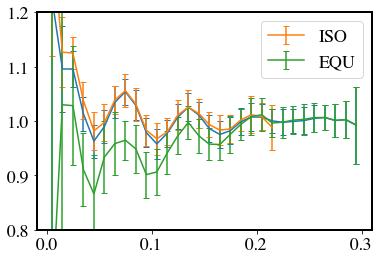

In [5]:
plt.errorbar(k_all, rbin_all.mean(axis=0), yerr=rvar_all, capsize=3)
plt.errorbar(k_iso, rbin_iso.mean(axis=0), yerr=rvar_iso, capsize=3, label='ISO')
plt.errorbar(k_equ, rbin_equ.mean(axis=0), yerr=rvar_equ, capsize=3, label='EQU')
plt.ylim(0.8, 1.2)
plt.legend()

In [ ]:
class Spectrum(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y

def read_spectra(spectra, ix=3, iy=3):
    print(len(spectra))

    y = []
    for spec in spectra:
        d_ = np.loadtxt(spec)
        y.append(d_[:, iy])
        
    y = np.array(y)
    x = d_[:, :ix]
    
    return Spectrum(x, y)

class Posterior:
    
    def __init__(self, k, r, KMIN=0.025, KMAX=0.250):        
        self.k = k
        self.r = r
        self.sp = src.models.BiSpectrum(self.k, self.r)
        is_g = (self.k > KMIN) & (self.k < KMAX)
        self.is_g = is_g.sum(axis=1) == 3
        
    def __call__(self, p):
        return self.nlogpost(p)
        
    def loglike(self, p):
        residual = self.r[self.is_g] - self.sp(self.k[self.is_g], p)
        is_ok = ~np.isnan(residual)    
        if is_ok.sum() == 0:
            return -np.inf
        else:
            return -0.5*(residual[is_ok]*residual[is_ok]).sum()

    def logprior(self, p):
        lp = 0.
        lp += 0. if  0.9 < p[0] < 1.1 else -np.inf
        lp += 0. if  0.8 < p[1] < 1.2 else -np.inf    
        for p_i in p[2:]:
            lp += 0. if  -1000. < p_i < 1000. else -np.inf
        return lp

    def logpost(self, p):
        return self.logprior(p) + self.loglike(p)

    def nlogpost(self, p):
        return -1.*self.logpost(p)
    
    
def plot(k_good, bk_good, bk_smooth_good):
    
    kmin, kmax = np.percentile(k_good[:,0], [0, 100])
    bins = np.arange(kmin-0.005, kmax+0.015, 0.01)
    bb, kb, __ = binned_statistic(k_good[:, 0], bk_good.mean(axis=0)/bk_smooth_good.mean(axis=0), bins=bins)
    
    bk_all = []
    for bk_i in bk_good:
        bkm_i, __, __ = binned_statistic(k_good[:, 0], bk_i/bk_smooth_good.mean(axis=0), bins=bins)
        bk_all.append(bkm_i)
    bk_all = np.array(bk_all)
    bk_std = bk_all.std(axis=0)
    print(bk_all.shape)
    km = 0.5*(kb[1:]+kb[:-1])

    fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
    fig.subplots_adjust(wspace=0.01)

    ax[0].scatter(k_good[:, 0], bk_good.mean(axis=0)/bk_smooth_good.mean(axis=0), marker='.', alpha=0.2, label=f'# data: {len(k_good[:, 0])}')
    ax[0].errorbar(km, bb, yerr=bk_std, color='r', ls='None', capsize=3, marker='.')
    ax[1].plot(k_good)

    ax[1].legend(['k1', 'k2', 'k3'])
    ax[0].legend()
    ax[0].set(ylim=(0.8, 1.2), xlabel='k1', ylabel=r'B/B$_{\rm Smooth}$')
    ax[1].set(xlabel='Index', ylabel=r'k$_{i}$')
    ax[1].yaxis.set_label_position("right")
    ax[1].yaxis.set_ticks_position("right")   
    
    return (km, bb, bk_std)
    
    
def plot2(k_good, bk_good, bk_smooth_good):
    
    kmin, kmax = np.percentile(k_good[:,0], [0, 100])
    bins = np.arange(kmin-0.005, kmax+0.015, 0.01)
    bb, kb, __ = binned_statistic(k_good[:, 0], (bk_good/bk_smooth_good).mean(axis=0), bins=bins)
    
    bk_all = []
    for bk_i in bk_good/bk_smooth_good:
        bkm_i, __, __ = binned_statistic(k_good[:, 0], bk_i, bins=bins)
        bk_all.append(bkm_i)
    bk_all = np.array(bk_all)
    bk_std = bk_all.std(axis=0)
    print(bk_all.shape)
    km = 0.5*(kb[1:]+kb[:-1])

    fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
    fig.subplots_adjust(wspace=0.01)

    ax[0].scatter(k_good[:, 0], (bk_good/bk_smooth_good).mean(axis=0), marker='.', alpha=0.2, label=f'# data: {len(k_good[:, 0])}')
    ax[0].errorbar(km, bb, yerr=bk_std, color='r', ls='None', capsize=3, marker='.')
    ax[1].plot(k_good)

    ax[1].legend(['k1', 'k2', 'k3'])
    ax[0].legend()
    ax[0].set(ylim=(0.8, 1.2), xlabel='k1', ylabel=r'B/B$_{\rm Smooth}$')
    ax[1].set(xlabel='Index', ylabel=r'k$_{i}$')
    ax[1].yaxis.set_label_position("right")
    ax[1].yaxis.set_ticks_position("right")        


def get_corr(x, y):
    cxy = ((x-x.mean())*(y-y.mean())).sum()
    cxx = ((x-x.mean())*(x-x.mean())).sum()
    cyy = ((y-y.mean())*(y-y.mean())).sum()
    return cxy/np.sqrt(cxx*cyy)

def correlate(r_b, r_p):
    
    corr = np.empty((r_b.shape[1], r_p.shape[1]))*np.nan
    for i in range(r_b.shape[1]):
        for j in range(r_p.shape[1]):
            corr[i, j] = get_corr(r_b[:, i], r_p[:, j])
            
    return corr


def plot_abacus_spectra():
    
    fig, ax = plt.subplots(ncols=3, figsize=(20, 5), sharey=True)
    fig.subplots_adjust(wspace=0.01)

    for i, t in enumerate(['LRG', 'ELG', 'QSO']):

        p_now = read_spectra(np.sort(glob(f'/Users/mehdi/data/Abacus_smooth/all_pk_{t}*')), ix=1, iy=2)
        p_wig = read_spectra(np.sort(glob(f'/Users/mehdi/data/AbacusData/pk_{t}*')), ix=1, iy=1)
        b_now = read_spectra(np.sort(glob(f'/Users/mehdi/data/Abacus_smooth/all_bk_{t}*')), iy=5)
        b_wig = read_spectra(np.sort(glob(f'/Users/mehdi/data/AbacusData/bk_{t}*')))

        r_p = p_wig.y / p_now.y.mean(axis=0)
        #ix_equi = equilateral(b_wig.x)
        #ix_iso = isoceles(b_wig.x)
        r_b = b_wig.y/b_now.y.mean(axis=0)

        k_b, r_bb = bin_bispectra(b_wig.x, r_b)

        ax[i].scatter(b_wig.x[:, 0], r_b.mean(axis=0), marker='.', label='B($k_{1},k_{2},k_{3}$)', alpha=0.2)
        ax[i].scatter(k_b, r_bb.mean(axis=0), label=r'<B($k_{1},k_{2},k_{3}$)>$_{k_{2}k_{3}}$')

        ax[i].scatter(p_wig.x, r_p.mean(axis=0), label='P(k)')
        ax[i].set(xlabel=r'$k$ or $k_{1}$ [$h^{-1}$Mpc]', title=t)

    ax[0].set(ylim=(0.8, 1.2), ylabel='Wiggle to no-Wiggle')
    lgn = ax[2].legend(loc=4, frameon=False, markerfirst=False, labelspacing=0.1,handletextpad=0.0)
    for i, tx in enumerate(lgn.get_texts()):
        tx.set_color('C%d'%i)
    
    fig.savefig('./figs/spectra_abacus.pdf', bbox_inches='tight')
    
    
def plot_corrmax(t = 'LRG'):
    p_now = read_spectra(np.sort(glob(f'/Users/mehdi/data/Abacus_smooth/all_pk_{t}*')), ix=1, iy=2)
    p_wig = read_spectra(np.sort(glob(f'/Users/mehdi/data/AbacusData/pk_{t}*')), ix=1, iy=1)
    b_now = read_spectra(np.sort(glob(f'/Users/mehdi/data/Abacus_smooth/all_bk_{t}*')), iy=5)
    b_wig = read_spectra(np.sort(glob(f'/Users/mehdi/data/AbacusData/bk_{t}*')))

    r_p = p_wig.y / p_now.y.mean(axis=0)
    r_b = b_wig.y/b_now.y.mean(axis=0)
    ix_equi = equilateral(b_wig.x)
    ix_iso = isoceles(b_wig.x)

    k_b, r_b_bin = bin_bispectra(b_wig.x, r_b)
    k_b_iso, r_b_bin_iso = bin_bispectra(b_wig.x[ix_iso, :], r_b[:, ix_iso])
    k_b_equ, r_b_bin_equ = bin_bispectra(b_wig.x[ix_equi, :], r_b[:, ix_equi])

    corr = correlate(r_b_bin, r_p)
    corr_equ = correlate(r_b_bin_equ, r_p)
    corr_iso = correlate(r_b_bin_iso, r_p[:, :22])
    corr_p = correlate(r_p, r_p)

    ix = np.random.permutation(np.arange(25))
    corr_shu = correlate(r_b_bin, r_p[ix, :])

    # because some bins are available
    corr_iso_f = np.zeros((30, 30))*np.nan
    corr_iso_f[:22, :22] = corr_iso

    fig, ax = plt.subplots(ncols=5, figsize=(20, 4), sharey=True)
    fig.subplots_adjust(wspace=0)

    names = ['PxP', 'PxB', 'PxBequi', 'PxBiso', 'PxB [shuffled]']
    for i, ci in enumerate([corr_p, corr, corr_equ, corr_iso_f, corr_shu]):
        print(np.percentile(ci, [0, 100]))
        map_ = ax[i].imshow(ci, origin='lower', vmin=-1, vmax=1., cmap='bwr', extent=[0, 0.3, 0, 0.3])
        ax[i].set_title(names[i])

    ax[0].set_ylabel('k')
    ax[2].set_xlabel('k')    
    cax = fig.add_axes([0.91, 0.2, 0.01, 0.6])
    fig.colorbar(map_, cax=cax, label=r'$\rho$')
    fig.savefig('figs/corr_pb.pdf', bbox_inches='tight')    

In [7]:
tracer = 'LRG'



bk_smooth = read_spectra(glob(f'/Users/mehdi/data/Abacus_smooth/all_bk_{tracer}*'), iy=5)
bk = read_spectra(glob(f'/Users/mehdi/data/AbacusData/bk_{tracer}*'))

25
25


In [11]:
np.sort(glob(f'/Users/mehdi/data/AbacusData/bk_{tracer}*'))

array(['/Users/mehdi/data/AbacusData/bk_LRGz0.8000',
       '/Users/mehdi/data/AbacusData/bk_LRGz0.8001',
       '/Users/mehdi/data/AbacusData/bk_LRGz0.8002',
       '/Users/mehdi/data/AbacusData/bk_LRGz0.8003',
       '/Users/mehdi/data/AbacusData/bk_LRGz0.8004',
       '/Users/mehdi/data/AbacusData/bk_LRGz0.8005',
       '/Users/mehdi/data/AbacusData/bk_LRGz0.8006',
       '/Users/mehdi/data/AbacusData/bk_LRGz0.8007',
       '/Users/mehdi/data/AbacusData/bk_LRGz0.8008',
       '/Users/mehdi/data/AbacusData/bk_LRGz0.8009',
       '/Users/mehdi/data/AbacusData/bk_LRGz0.8010',
       '/Users/mehdi/data/AbacusData/bk_LRGz0.8011',
       '/Users/mehdi/data/AbacusData/bk_LRGz0.8012',
       '/Users/mehdi/data/AbacusData/bk_LRGz0.8013',
       '/Users/mehdi/data/AbacusData/bk_LRGz0.8014',
       '/Users/mehdi/data/AbacusData/bk_LRGz0.8015',
       '/Users/mehdi/data/AbacusData/bk_LRGz0.8016',
       '/Users/mehdi/data/AbacusData/bk_LRGz0.8017',
       '/Users/mehdi/data/AbacusData/bk_LRGz0.

In [14]:
np.sort(glob(f'/Users/mehdi/data/Abacus_smooth/all_bk_LRG*'))

array(['/Users/mehdi/data/Abacus_smooth/all_bk_LRGz0_8000.txt',
       '/Users/mehdi/data/Abacus_smooth/all_bk_LRGz0_8001.txt',
       '/Users/mehdi/data/Abacus_smooth/all_bk_LRGz0_8002.txt',
       '/Users/mehdi/data/Abacus_smooth/all_bk_LRGz0_8003.txt',
       '/Users/mehdi/data/Abacus_smooth/all_bk_LRGz0_8004.txt',
       '/Users/mehdi/data/Abacus_smooth/all_bk_LRGz0_8005.txt',
       '/Users/mehdi/data/Abacus_smooth/all_bk_LRGz0_8006.txt',
       '/Users/mehdi/data/Abacus_smooth/all_bk_LRGz0_8007.txt',
       '/Users/mehdi/data/Abacus_smooth/all_bk_LRGz0_8008.txt',
       '/Users/mehdi/data/Abacus_smooth/all_bk_LRGz0_8009.txt',
       '/Users/mehdi/data/Abacus_smooth/all_bk_LRGz0_8010.txt',
       '/Users/mehdi/data/Abacus_smooth/all_bk_LRGz0_8011.txt',
       '/Users/mehdi/data/Abacus_smooth/all_bk_LRGz0_8012.txt',
       '/Users/mehdi/data/Abacus_smooth/all_bk_LRGz0_8013.txt',
       '/Users/mehdi/data/Abacus_smooth/all_bk_LRGz0_8014.txt',
       '/Users/mehdi/data/Abacus_smooth/

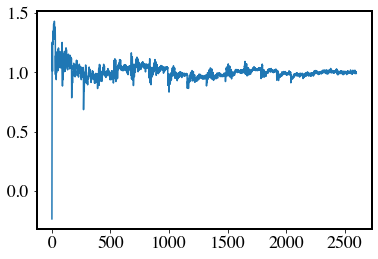

In [9]:
plt.plot(bk.y.mean(axis=0)/bk_smooth.y.mean(axis=0))

25
25
25
25
(25, 30) (30,)
25
25
25
25
(25, 30) (30,)
25
25
25
25
(25, 30) (30,)


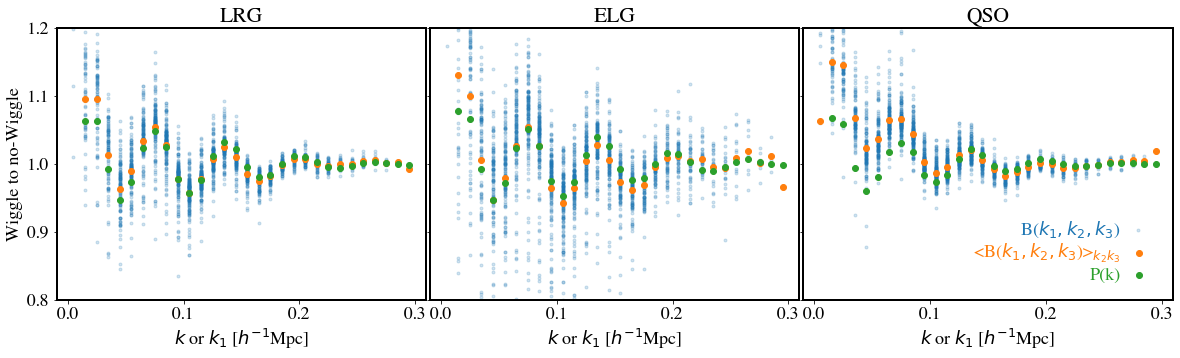

In [7]:
plot_abacus_spectra()

25
25
25
25
(25, 30) (30,)
(25, 22) (22,)
(25, 30) (30,)
[-0.49081954  1.        ]
[-0.59242475  0.93300078]
[-0.59239179  0.6794852 ]
[nan nan]
[-0.59867389  0.58213697]


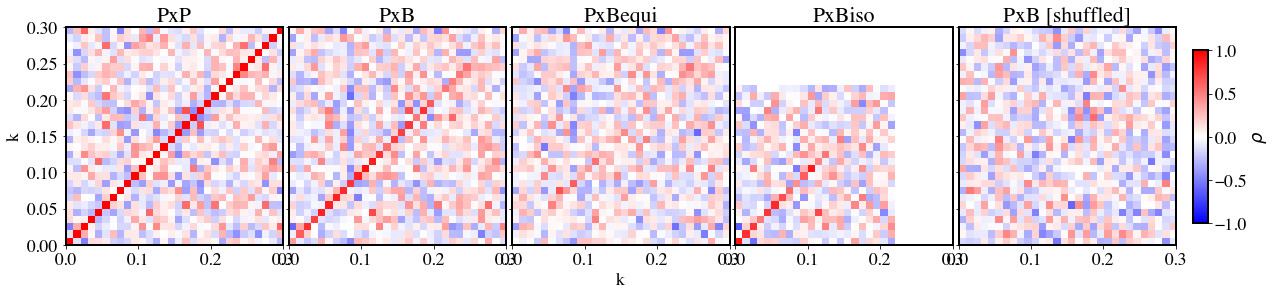

In [9]:
plot_corrmax('LRG')

25
25
25
25
(25, 30) (30,)
(25, 22) (22,)
(25, 30) (30,)
[-0.63678771  1.        ]
[-0.71521793  0.94530243]
[-0.59257361  0.64341254]
[nan nan]
[-0.60073161  0.6127798 ]


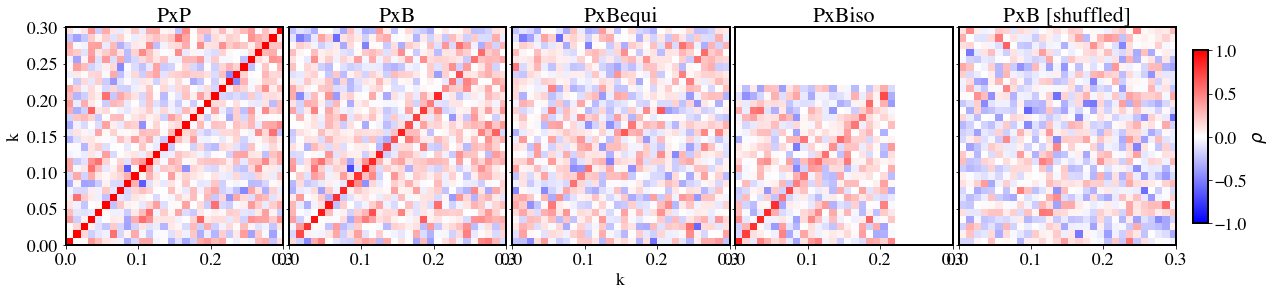

In [10]:
plot_corrmax('QSO')

25
25
25
25
(25, 30) (30,)
(25, 22) (22,)
(25, 30) (30,)
[-0.62785648  1.        ]
[-0.62380258  0.75624358]
[-0.56535431  0.64464469]
[nan nan]
[-0.66489603  0.56501661]


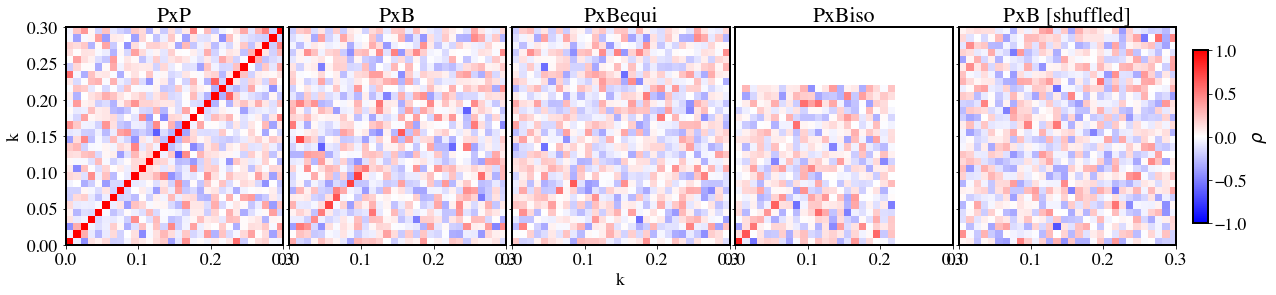

In [11]:
plot_corrmax('ELG')

(25, 30)
(25, 22)
(25, 30)


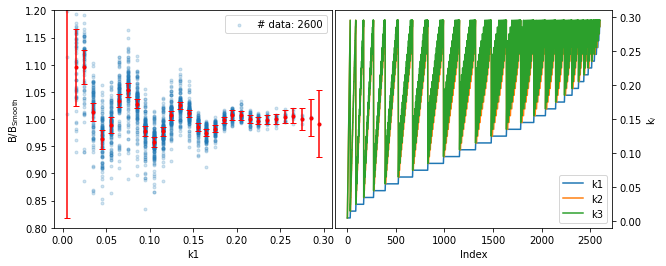

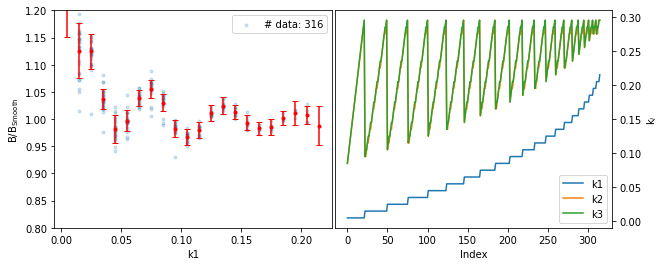

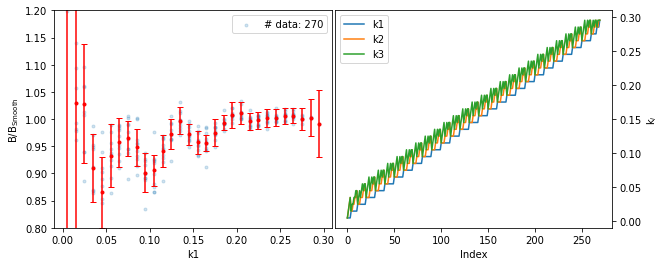

In [26]:
all_bk = plot(b_wig.x, b_wig.y,  b_now.y)
iso_bk = plot(b_wig.x[ix_iso], b_wig.y[:, ix_iso],  b_now.y[:, ix_iso])
eqi_bk = plot(b_wig.x[ix_equi], b_wig.y[:, ix_equi],  b_now.y[:, ix_equi])

Text(0, 0.5, 'BAO')

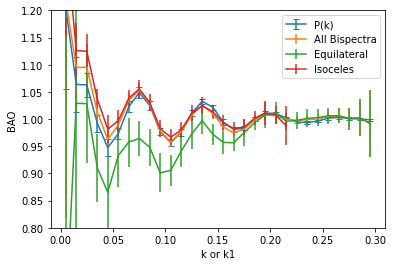

In [27]:
plt.errorbar(p_wig.x, p_wig.y.mean(axis=0)/p_now.y.mean(axis=0), 
             yerr=p_wig.y.std(axis=0)/p_now.y.mean(axis=0), 
             capsize=3, label='P(k)', zorder=-10)

labels = ['All Bispectra', 'Equilateral', 'Isoceles']
for i, bk_i in enumerate([all_bk, eqi_bk, iso_bk]):
    plt.errorbar(*bk_i, zorder=-10, label=labels[i])
    
    #print(np.corrcoef(pbao.y.mean(axis=0)/psmooth.y.mean(axis=0), bk_i[1]))
plt.ylim(0.8, 1.2)
plt.legend()
plt.xlabel('k or k1')
plt.ylabel('BAO')

(25, 30)
(25, 30)


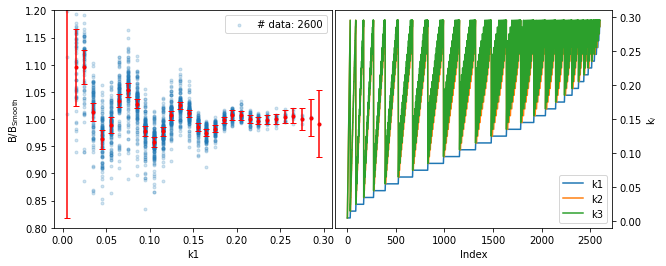

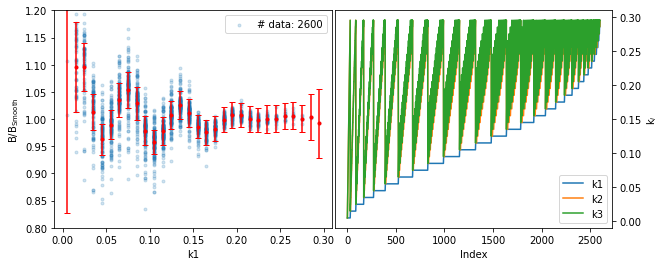

In [61]:
plot(k, bao.y, smooth.y)
plot2(k, bao.y, smooth.y)

(25, 30)
(25, 30)


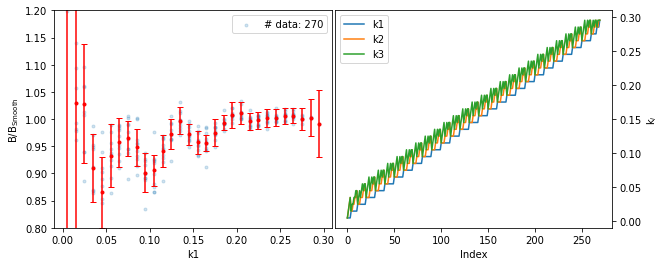

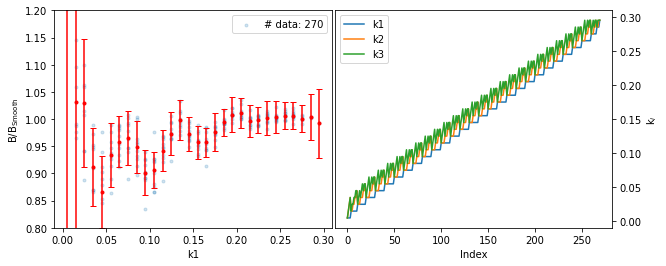

In [59]:
plot(k[ix_equi], bao.y[:, ix_equi], smooth.y[:, ix_equi])
plot2(k[ix_equi], bao.y[:, ix_equi], smooth.y[:, ix_equi])

(25, 22)
(25, 22)


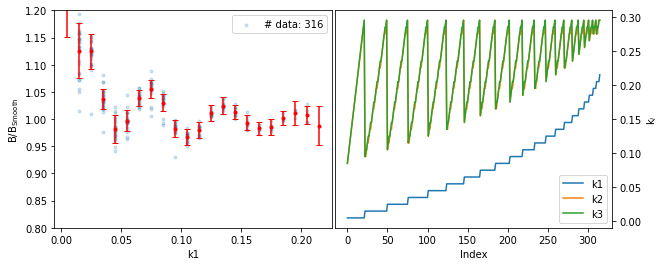

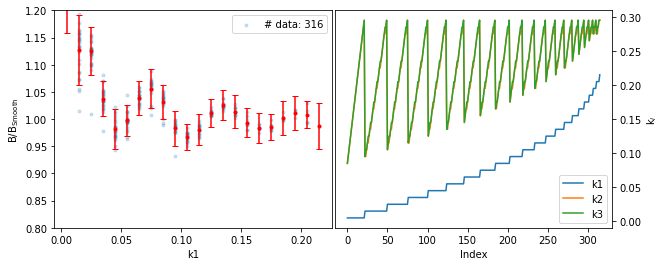

In [60]:
plot(k[ix_iso], bao.y[:, ix_iso], smooth.y[:, ix_iso])
plot2(k[ix_iso], bao.y[:, ix_iso], smooth.y[:, ix_iso])

In [11]:
index = 8000
d = np.loadtxt(f'/Users/mehdi/data/AbacusData/bk_LRGz0.{index}')
#ds = np.loadtxt(f'/Users/mehdi/data/Abacus_smooth/all_bk_LRGz0_{index}.txt')
k = d[:, :3]
r = d[:, 3]/smooth.y.mean(axis=0) #ds[:, 5]
lpost = Posterior(k, r)

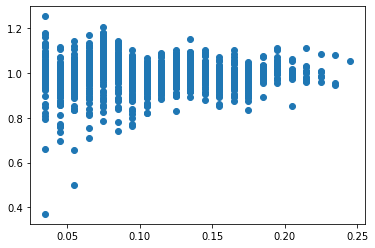

In [12]:
plt.scatter(lpost.k[lpost.is_g, 0], lpost.r[lpost.is_g])

In [47]:
alphas = []

for index in np.arange(8000, 8025):
    
    d = np.loadtxt(f'/Users/mehdi/data/AbacusData/bk_LRGz0.{index}')
    #ds = np.loadtxt(f'/Users/mehdi/data/Abacus_smooth/all_bk_LRGz0_{index}.txt')
    k = d[:, :3]
    r = d[:, 3]/smooth.y.mean(axis=0) #ds[:, 5]
    
    t0 = time()
    lpost = Posterior(k, r)
    result = minimize(lpost, [1.08, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
                  method='Nelder-Mead')
    t1 = time()
    alphas.append(result.x)
    print('%.1f'%(t1-t0), 'sec')

40.3 sec
58.4 sec
30.8 sec
18.4 sec
31.6 sec
18.5 sec
36.3 sec
26.2 sec
43.6 sec
35.1 sec
26.9 sec
29.3 sec
38.3 sec
28.7 sec
30.5 sec
23.5 sec
34.7 sec
59.6 sec
42.0 sec
35.1 sec
59.2 sec
34.6 sec
25.1 sec
30.6 sec
62.5 sec


In [39]:
alphas = np.array(alphas)

(array([3., 0., 3., 0., 0., 0., 2., 3., 5., 9.]),
 array([0.99993026, 0.99993746, 0.99994467, 0.99995188, 0.99995908,
        0.99996629, 0.9999735 , 0.9999807 , 0.99998791, 0.99999512,
        1.00000232]),
 <BarContainer object of 10 artists>)

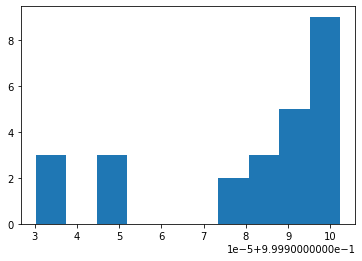

In [40]:
plt.hist(alphas[:, 0])

In [41]:
np.std(alphas[:, 0])

2.34567519547567e-05

In [42]:
alphas[:, 0]

array([0.99999843, 0.99997965, 0.99999125, 0.99998612, 0.99999536,
       0.99993467, 0.99997959, 1.00000232, 0.99999245, 0.9999459 ,
       0.99994992, 0.99999812, 0.99998988, 0.99999069, 0.99999777,
       0.99993026, 0.99998532, 0.99999939, 0.99999993, 0.99998593,
       0.99999848, 0.99995022, 0.99993145, 0.99998972, 0.99999981])

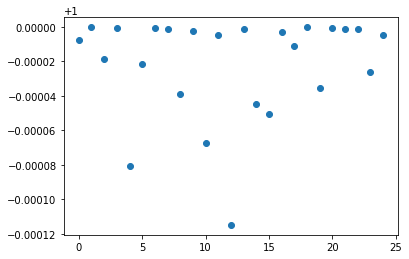

In [30]:
plt.scatter(np.arange(25), alphas[:, 0])

(0.5, 1.5)

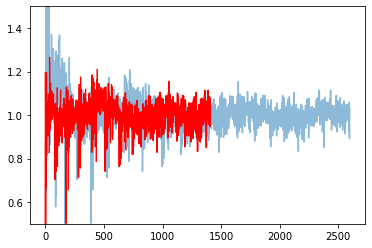

In [14]:
plt.plot(r, alpha=0.5)
plt.plot(lpost.sp(k[lpost.is_g], result.x), 'r')
plt.ylim(0.5, 1.5)

25
25
25
25
25
25


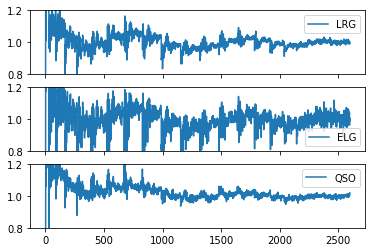

In [63]:
fig, ax = plt.subplots(nrows=3, sharex=True)

for i, tracer in enumerate(['LRG', 'ELG', 'QSO']):
    
    bk_lrg = read_spectra(glob(f'/Users/mehdi/data/AbacusData/bk_{tracer}*'))
    bk_lrg_smooth = read_spectra(glob(f'/Users/mehdi/data/Abacus_smooth/all_bk_{tracer}*'), iy=5)
    
    ax[i].plot(bk_lrg.y.mean(axis=0)/bk_lrg_smooth.y.mean(axis=0), label=tracer)
    ax[i].set_ylim(0.8, 1.2)
    ax[i].legend()

(0.5, 1.5)

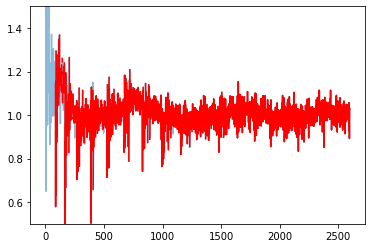

In [130]:
plt.plot(r, alpha=0.5)
plt.plot(sp(k, result.x), 'r')
plt.ylim(0.5, 1.5)

In [129]:
result.x

array([ 9.99992554e-01,  1.00006685e+00,  5.99676407e-05,  1.45085007e-04,
       -8.80192600e-05,  5.29581546e-04, -2.36323683e-06,  3.03462479e-04,
        2.68246495e-06, -5.80054391e-04,  8.09639005e-05])

In [117]:
for a in np.linspace(0.9, 1.1, 11):
    p = [a, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    print(a, nlogpost(p))

0.9 3.564736095172842
0.92 3.0797610848349146
0.9400000000000001 2.632174048482171
0.9600000000000001 1.8480587766918042
0.9800000000000001 0.6909532789837665
1.0 -0.0
1.02 0.6806387123149882
1.04 1.7097082339422012
1.06 2.3636706932660423
1.08 2.686779525306486
1.1 2.975514545221868


In [4]:
prepar = src.io.Preparer()

loading cache...
(15000, 30)
loading cache...
(15000, 2600)
Done reading Molino


In [6]:
prepar.prep('glam', 'gal')

creating cache with iy=1
(1097, 30)
creating cache with iy=1
(935, 30)
creating cache with iy=3
(1097, 2600)
creating cache with iy=3
(970, 2600)
Done writing mean and covariances for mock=glam and gal=gal


In [7]:
prepar.prep('abacus', 'lrg')

creating cache with iy=1
(25, 30)
creating cache with iy=2
(25, 30)
creating cache with iy=3
(25, 2600)
creating cache with iy=4
(25, 2600)
Done writing mean and covariances for mock=abacus and gal=lrg


## Plot data

In [8]:
pk_glam = src.io.Spectrum('./cache/glam_gal_pkmean.npz')
pks_glam = src.io.Spectrum('./cache/glam_gal_pksmoothmean.npz')
pk_abacus = src.io.Spectrum('./cache/abacus_lrg_pkmean.npz')
pks_abacus = src.io.Spectrum('./cache/abacus_lrg_pksmoothmean.npz')

bk_glam = src.io.Spectrum('./cache/glam_gal_bkmean.npz')
bks_glam = src.io.Spectrum('./cache/glam_gal_bksmoothmean.npz')
bk_abacus = src.io.Spectrum('./cache/abacus_lrg_bkmean.npz')
bks_abacus = src.io.Spectrum('./cache/abacus_lrg_bksmoothmean.npz')

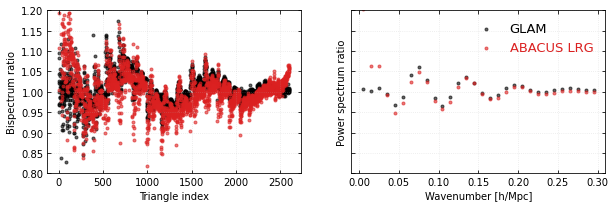

In [9]:
tix =  np.arange(bk_glam.x.shape[0])
src.plots.plot_spectra([(tix,   bk_glam.y/bks_glam.y),
                        (tix,   bk_abacus.y/bks_abacus.y)], 
                       [(pk_glam.x, pk_glam.y/pks_glam.y),
                        (pk_glam.x, pk_abacus.y/pks_abacus.y)],
                       ['GLAM', 'ABACUS LRG'])

In [26]:
bk_abacus = src.io.Spectrum('./cache/abacus_lrg_bkmean.npz')
bk_abacus_old = src.io.Spectrum('./cache27feb/bk_mean_abacus_bao.npz')

Text(0, 0.5, 'k1*k2*k3*B')

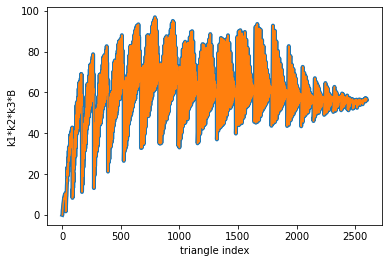

In [39]:
plt.plot(bk_abacus.x[:, 0]*bk_abacus.x[:, 1]*bk_abacus.x[:, 2]*bk_abacus.y, lw=4)
plt.plot(bk_abacus.x[:, 0]*bk_abacus.x[:, 1]*bk_abacus.x[:, 2]*bk_abacus_old.y)
plt.xlabel('triangle index')
plt.ylabel('k1*k2*k3*B')

## Test MCMC

0.03
0.03
0.03
0.03
0.03
0.03


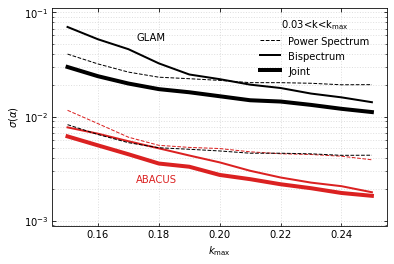

In [18]:
def plot_sigmakmax():
    
    kmax1, sigma1 = src.io.read_sigmas(glob('mcmc_feb27/pk_abacus_lrg_abacus_*.npz'))
    kmax2, sigma2 = src.io.read_sigmas(glob('mcmc_feb27/pk_glam_gal_glam_*.npz'))
    kmax3, sigma3 = src.io.read_sigmas(glob('mcmc_jan31/bk_abacus_abacus_*.npz'))
    kmax4, sigma4 = src.io.read_sigmas(glob('mcmc_jan31/bk_glam_glam_*.npz'))
    kmax5, sigma5 = src.io.read_sigmas(glob('mcmc_jan31/pb_abacus_abacus_*.npz'))
    kmax6, sigma6 = src.io.read_sigmas(glob('mcmc_jan31/pb_glam_glam_*.npz'))
    
    fg, ax = plt.subplots()
    
    ax.plot(kmax2, sigma2, color='#000000', lw=1, label='Power Spectrum', ls='--')
    ax.plot(kmax4, sigma4, color='#000000', lw=2, label='Bispectrum')
    ax.plot(kmax6, sigma6, color='#000000', lw=4, label='Joint')

    ax.plot(kmax1, sigma1, color='#db2121', lw=1, ls='--')
    ax.plot(kmax3, sigma3, color='#db2121', lw=2)
    ax.plot(kmax5, sigma5, color='#db2121', lw=4)
    ax.plot(kmax2, sigma2/np.sqrt(8**1.5), color='#000000', lw=1, ls='--')

    lgn = fg.legend(title=r'0.03<k<k$_{\rm max}$', bbox_to_anchor=(0.88, 0.88), frameon=False)        
    ax.set(xlabel=r'$k_{\rm max}$', ylabel=r'$\sigma (\alpha)$', yscale='log', ylim=(9.0e-4, 1.1e-1))
    ax.tick_params(direction='in', right=True, top=True, which='both', axis='both')
    ax.grid(True, ls=':', lw=1, which='both', alpha=0.4)    
    ax.text(0.25, 0.85, 'GLAM', transform=ax.transAxes)
    ax.text(0.25, 0.2, 'ABACUS', color='#db2121', transform=ax.transAxes)    
    fg.savefig('../bisp4desi/figures/sigma_kmax.pdf', bbox_inches='tight')   
    
plot_sigmakmax()

In [9]:
chi2s = {}
for s in ['glam', 'abacus']:
    for p in ['pk', 'bk']:
        chi2s[f'{s}_{p}'] = read_chi2list(np.sort(glob(f'mcmc_jan31/{p}_{s}_{s}_*.npz')))

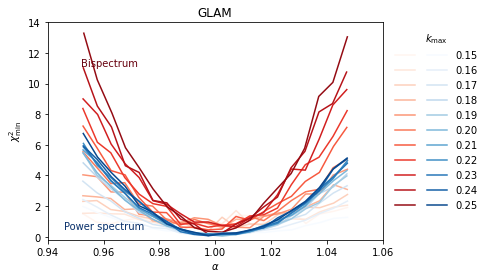

In [10]:
src.plots.plot_chi2(chi2s['glam_bk'], chi2s['glam_pk'], title='GLAM')

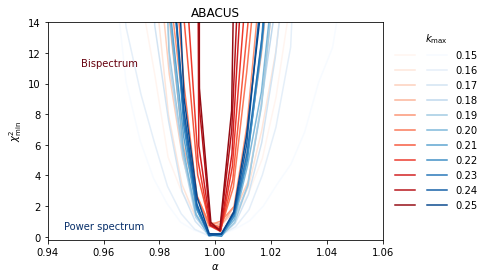

In [11]:
src.plots.plot_chi2(chi2s['abacus_bk'], chi2s['abacus_pk'], title='ABACUS')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

In [82]:
def plot_detection(s, km='0.250'):    
    d1 = np.load(f'mcmc_jan31/pk_{s}_{s}_0.030_{km}.npz')
    d2 = np.load(f'mcmc_jan31/bk_{s}_{s}_0.030_{km}.npz')
    d3 = np.load(f'mcmc_jan31/pb_{s}_{s}_0.030_{km}.npz')

    fig, ax = plt.subplots()
    alpha_edge = np.linspace(0.95, 1.05, num=21)

    ls = ['--', '-', '-']
    lw = [1, 2, 4]

    for i, (di, ni) in enumerate(zip([d1, d2, d3],
                                     ['Power Spectrum', 'Bispectrum', 'Joint'])):
        x = di['chain'][5000:, :, 0].flatten()
        y = -2.*di['log_prob'][5000:, :].flatten()
        print(y.min())
        ym = binned_statistic(x, y, statistic=np.min, bins=alpha_edge)[0]
        xm = binned_statistic(x, x, statistic=np.mean, bins=alpha_edge)[0]
        ax.plot(xm, ym, label=ni, ls=ls[i], color='#000000', alpha=0.8, lw=lw[i])
        
    leg = ax.legend(frameon=False, title=fr'$0.03<k<{km}$')
    ax.set(xlabel=r'$\alpha$', ylabel=r'$\chi^{2}_{\rm min}$', title=s.upper(), 
           ylim=(-0.2, 14), xlim=(0.94, 1.06))
    fig.savefig(f'../bisp4desi/figures/chi2alpha_{s}.pdf', bbox_inches='tight')

0.177504177320562
0.7644025550586349
1.2842154629033131


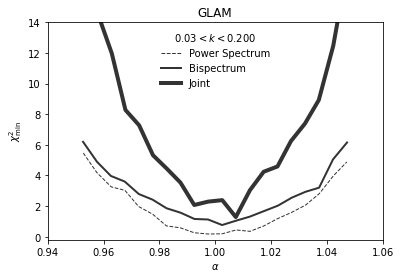

In [88]:
plot_detection('glam', '0.200')

0.12390150304562333
0.8977478643033432
2.545098892381207


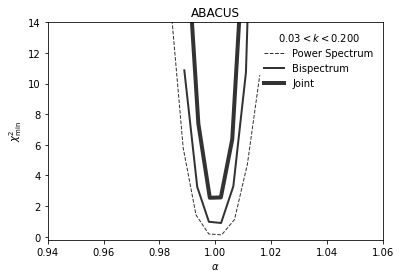

In [89]:
plot_detection('abacus', '0.200')

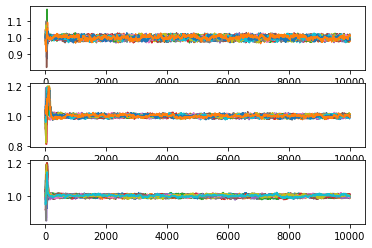

In [62]:
s = 'abacus'
km = '0.160'
d1 = np.load(f'mcmc_jan31/pk_{s}_{s}_0.030_{km}.npz')
d2 = np.load(f'mcmc_jan31/bk_{s}_{s}_0.030_{km}.npz')
d3 = np.load(f'mcmc_jan31/pb_{s}_{s}_0.030_{km}.npz')

fg, ax = plt.subplots(nrows=3)
for i, di in enumerate([d1, d2, d3]):    
    ax[i].plot(di['chain'][:, :, 0])



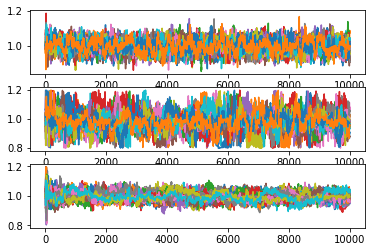

In [51]:
s = 'glam'
km = '0.160'
d1 = np.load(f'mcmc_jan31/pk_{s}_{s}_0.030_{km}.npz')
d2 = np.load(f'mcmc_jan31/bk_{s}_{s}_0.030_{km}.npz')
d3 = np.load(f'mcmc_jan31/pb_{s}_{s}_0.030_{km}.npz')

fg, ax = plt.subplots(nrows=3)
for i, di in enumerate([d1, d2, d3]):    
    ax[i].plot(di['chain'][:, :, 0])


In [3]:
dl = DataLoader()

In [4]:
k, pk_glam = dl.load('glam_pk_bao', 1)
__, pk_glam_nobao = dl.load('glam_pk_nobao', 1)
__, pk_molino = dl.load('molino_pk', 1)

k3, bk_glam = dl.load('glam_bk_bao', 3)
__, bk_glam_nobao = dl.load('glam_bk_nobao', 3)
__, bk_molino = dl.load('molino_bk', 3)

loading cache...
(1097, 30)
loading cache...
(935, 30)
loading cache...
(15000, 30)
loading cache...
(1097, 2600)
loading cache...
(970, 2600)
loading cache...
(15000, 2600)


In [11]:
c_g = np.column_stack([pk_glam/pk_glam_nobao.mean(axis=0), bk_glam/bk_glam_nobao.mean(axis=0)])
c_m = np.column_stack([pk_molino, bk_molino])
c_g.shape, c_m.shape

((1097, 2630), (15000, 2630))

In [36]:
class A(object):
    def __init__(self, v):
        self.a = v
    def __call__(self, x):
        return self.a+x
    
class B(object):
    def __init__(self, v):
        self.a = v
    def __call__(self, x):
        return self.a-x 
    
    
class D(A, B):
    def __init__(self, v1, v2):
        A.__init__(self, v1)
        B.__init__(self, v2)
    
    def __call__(self, x1, x2):
        c1 = A.__call__(self, x1)
        c2 = B.__call__(self, x2)
        return (c1, c2)

In [37]:
a = A(12)
b = B(12)

In [38]:
d = D(12, 12)

In [39]:
d(2, 3)

(14, 9)

In [40]:
a(2), b(3)

(14, 9)

(0.8, 1.2)

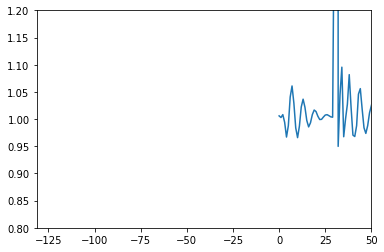

In [10]:
plt.plot(c.mean(axis=0))
plt.xlim(xmax=50)
plt.ylim(0.8, 1.2)

In [27]:
def gelman_rubin(chain):
    # chain: #steps, #chain
    ssq = np.var(chain, axis=0, ddof=1) 
    W = np.mean(ssq, axis=0)   # within chain var
    pb = np.mean(chain, axis=0)
    pbb = np.mean(pb, axis=0)

    n = chain.shape[0]
    m = chain.shape[1]    
    B = n / (m - 1) * np.sum((pbb - pb)**2, axis=0) # between chain var
    var_p = (n - 1) / n * W + 1 / n * B
    rhat = np.sqrt(var_p / W)
    return rhat

In [30]:
gelman_rubin(d_['chain'][:1000, :, 0])

1.0088613431756197

In [25]:
d_['chain'][5000:, :, 0].shape

(5000, 22)

[0.96224234 1.06423153]
[0.69675414 1.54220246]
[-6.0835285   4.74141155]
[-40.67944398  47.81204999]
[-0.23482382  0.26914284]
[-142.23198506  120.46243245]
[-0.0044365   0.00392685]


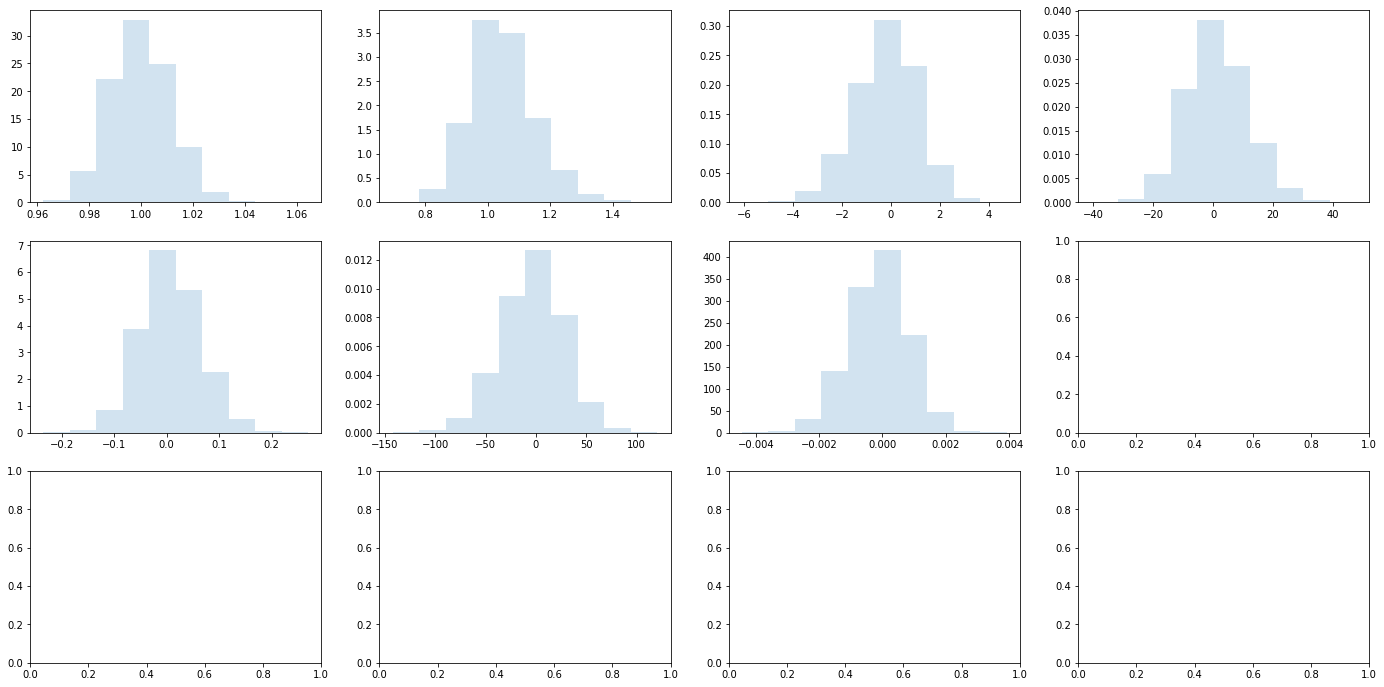

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(24, 12))
ax = ax.flatten()

for i in range(d_['chain'].shape[-1]):
    # ax[i].hist(d['chain'][5000:, :, i].flatten(), alpha=0.2, density=True)
    ax[i].hist(d_['chain'][5000:, :, i].flatten(), alpha=0.2, density=True)
    print(np.percentile(d_['chain'][5000:, :, i].flatten(), [0, 100]))
    

Text(0.5, 0, 'wavenumber [h/Mpc]')

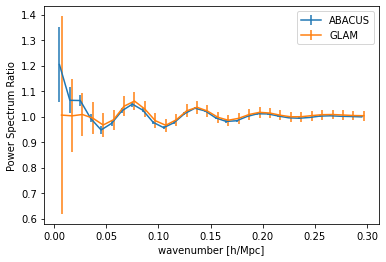

In [18]:
i = 0
for mock in ['abacus', 'glam']:
    
    stat = 'pk'
    # mock = 'abacus'
    temp = mock
    y = Spectrum(f'cache/{stat}_mean_{mock}_bao.npz')
    ys = Spectrum(f'cache/{stat}_mean_{temp}_nobao.npz')
    cov = Spectrum(f'cache/{stat}_cov_{mock}_bao.npz')
    plt.errorbar(y.x+0.002*i, y.y/ys.y, yerr=np.diagonal(cov.y)**0.5, label=mock.upper())
    i += 1
plt.legend()
plt.ylabel('Power Spectrum Ratio')
plt.xlabel('wavenumber [h/Mpc]')

In [17]:
y.x

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295])

In [5]:
is_g = (y.x > 0.015) & (y.x < 0.13) 
is_g = is_g.sum(axis=1) == 3

x_g = y.x[is_g]
r_g = (y.y/ys.y)[is_g]
c_g = cov.y[is_g,:,][:, is_g]
ic_g = np.linalg.inv(c_g)

In [9]:
from src.models import BiSpectrum

In [10]:
r_int = BiSpectrum(y.x, y.y/ys.y)

In [29]:
def loglike(p):
    res = r_g - r_int(x_g, p)
    is_ok = ~np.isnan(res)    
    #if is_ok.sum() ==0:
    #    return -np.inf
    #else:            
    return  -0.5*res[is_ok].dot(ic_g[is_ok, :][:, is_ok].dot(res[is_ok]))

def logprior(p):
    lp = 0.
    lp += 0. if  0.9 < p[0] < 1.1 else -np.inf
    lp += 0. if  0.8 < p[1] < 1.2 else -np.inf    
    for p_i in p[2:]:
        lp += 0. if  -1 < p_i < 1. else -np.inf
    return lp

def logpost(p):
    return loglike(p) + logprior(p)

def nlogpost(p):
    return -1.*logpost(p)

In [30]:
guess = np.array([1.001, 1.001, 1.1e-5, 1.2e-5, 1.3e-5, 1.1e-5, 1.2e-5, 1.3e-5, 1.0e-5, 0.9e-5, 1.1e-5])
start = (guess + guess*0.02*np.random.randn(50, 11))

In [31]:
for s in start:
    print(logpost(s))

-0.019408861842226496
-0.007620845077150634
-0.007888390203940148
-0.008862727394702438
-0.0024373891472734568
-0.01406453427391325
-0.017468073171336744
-0.0901179160143377
-0.0023148334411223475
-0.020863976518058932
-0.034029590589402275
-0.008627994620870622
-0.002027414006793732
-0.007155820757474676
-0.005916715661599145
-0.0031888498545395083
-0.026194485193954536
-0.009948746348104914
-0.004950925198240695
-0.0030730159466689374
-0.002608491247113996
-0.013832275991846894
-0.01014591490436914
-0.017581117210251573
-0.018327415319419213
-0.00800648592484167
-0.009829408943324135
-0.03152695528977704
-0.06331713761471565
-0.013110156783927913
-0.01415095152754359
-0.01224262929471479
-0.010791320474832326
-0.054848706455694604
-0.021607669673610247
-0.013293553227040206
-0.003061372293617159
-0.0006656195760880825
-0.001774707942634408
-0.018009694934513945
-0.009454128082254858
-0.010761348131810008
-0.10845174738823338
-0.030046678096103747
-0.0014945713867181255
-0.00276594295

In [ ]:
#     vr = 8
#     p = 1.5
#     ax[2].plot(bk_abacus.var(axis=0)/p3_abacus*vr**p, label='ABACUS', alpha=0.8)
#     ax[2].plot(bk_glam.var(axis=0)/p3_glam,           label='GLAM')
#     ax[2].plot(bk_molino.var(axis=0)/p3_molino,       label='MOLINO')
#     ax[3].plot(k, pk_abacus.var(axis=0)/pk_abacus.mean(axis=0)**2*vr**p, label='ABACUS')
#     ax[3].plot(k, pk_glam.var(axis=0)/pk_glam.mean(axis=0)**2,           label='GLAM')
#     ax[3].plot(k, pk_molino.var(axis=0)/pk_molino.mean(axis=0)**2,       label='MOLINO')
#     ax[2].set(xlabel='Triangle index', yscale='log', 
#               ylabel='Normalized bispectrum dispersion')#, ylabel=r'$\frac{\sigma^{2}_{B}}{P^{3}V^{1.5}}$')
#     ax[3].legend(bbox_to_anchor=(-1, 2.1, 1.5, 0.15), 
#                  mode='expand', ncol=3, frameon=False, fontsize=13)    
#     # fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
#     # ax[0].set(ylabel=r'$\chi^{2}(\alpha)$', xlabel=r'$\alpha$', title='Scoccimaro template')
#     # ax[1].set(xlabel=r'$\alpha$', title='GLAM template')
#     # # different curves for different k-max values

#     # fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
    # ax[0].set(xlabel='Triangle index', title='GLAM', ylabel='Bispectrum ratio')
    # ax[1].set(xlabel=r'kmax', title='GLAM', ylabel=r'$\sigma(\alpha)$')      

In [11]:
pk_glam_bao.x, pk_glam_bao.y

(array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
        0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
        0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
        0.275, 0.285, 0.295]),
 array([13.30533495, 12.26090917,  9.8172015 ,  7.718056  ,  6.04934489,
         5.11676342,  4.53520081,  3.95469598,  3.29829311,  2.75108726,
         2.37053697,  2.14782723,  1.98742684,  1.81072653,  1.61351515,
         1.43488749,  1.29848154,  1.20190007,  1.12622522,  1.052373  ,
         0.97680565,  0.90427197,  0.84115018,  0.78982083,  0.74668514,
         0.70710681,  0.66898349,  0.63290016,  0.59951996,  0.56984191]))

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295])

In [ ]:
k, pk_glam = dl.load('glam_pk_bao', 1)
__, pk_glam_nobao = dl.load('glam_pk_nobao', 1)
__, pk_molino = dl.load('molino_pk', 1)
__, pk_abacus = dl.load('abacus_pk', 1)
__, pk_abacus_nobao = dl.load('abacus_pk_nobao', 2)

k3, bk_glam = dl.load('glam_bk_bao', 3)
__, bk_glam_nobao = dl.load('glam_bk_nobao', 3)
__, bk_molino = dl.load('molino_bk', 3)
__, bk_abacus = dl.load('abacus_bk', 3)
__, bk_abacus_nobao = dl.load('abacus_bk_nobao', 4)

p3_abacus = get_p3(k3, pk_abacus.mean(axis=0))
p3_molino = get_p3(k3, pk_molino.mean(axis=0))
p3_glam   = get_p3(k3, pk_glam.mean(axis=0))



loading cache...
(1097, 30)
loading cache...
(935, 30)
loading cache...
(15000, 30)
loading cache...
(25, 30)
loading cache...
(25, 30)
loading cache...
(1097, 2600)
loading cache...
(970, 2600)
loading cache...
(15000, 2600)
loading cache...
(25, 2600)
loading cache...
(25, 2600)


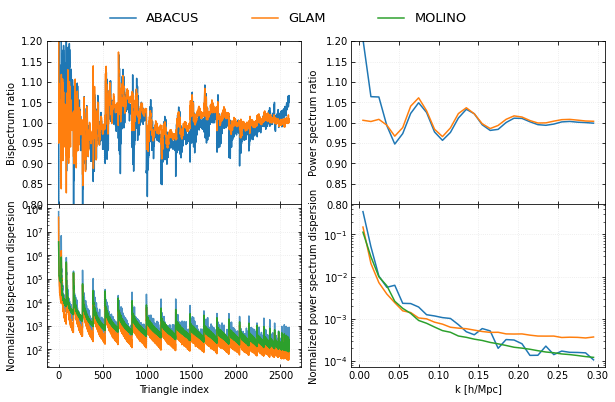

In [5]:
plot_spectra(dl)

loading cache...
(1097, 30)
loading cache...
(935, 30)
loading cache...
(15000, 30)
loading cache...
(25, 30)
loading cache...
(25, 30)
loading cache...
(1097, 2600)
loading cache...
(970, 2600)
loading cache...
(15000, 2600)
loading cache...
(25, 2600)
loading cache...
(25, 2600)


In [7]:
# C_P ~ var(P)/(P^{2}V^p)  # p = 1.5
# C_B ~ var(B)/(P^{3}V^p)

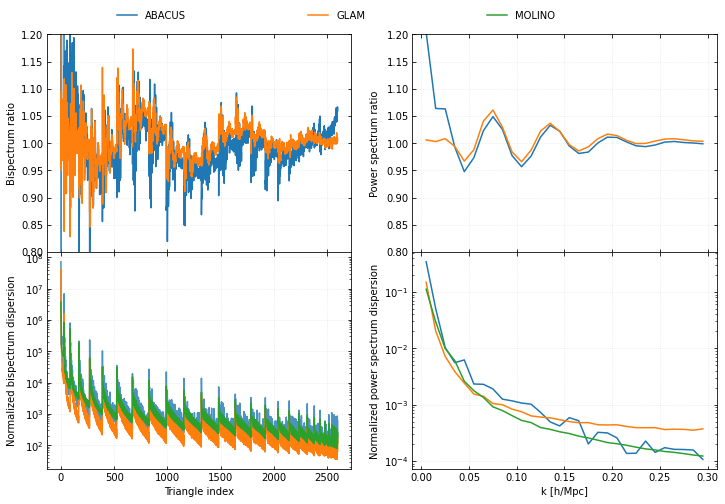

In [8]:
rcov_p = get_cov(pk_molino)
rcov_b = get_cov(bk_molino)

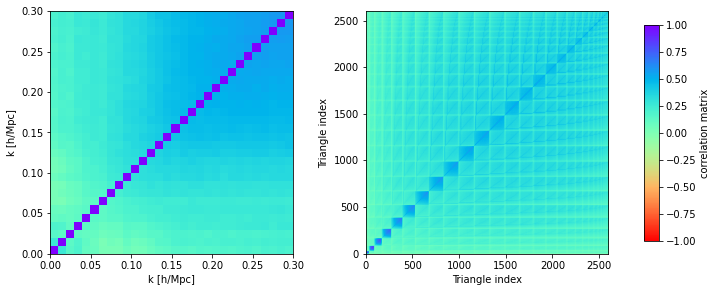

In [10]:
plot_rcov(rcov_p, rcov_b)

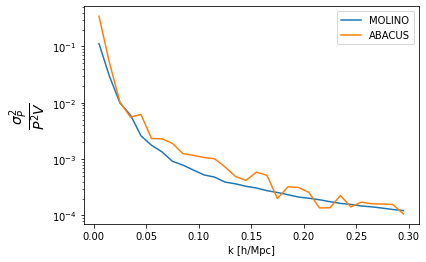

In [2]:
%matplotlib inline

In [3]:
import helpers as hp

In [5]:
bk_a = hp.read_abacus_bk()
bk_g = hp.read_glam_bk()
bk_gs = hp.read_glam_bk_nobao()

In [21]:
files = glob('/mnt/data1/Abacus_All/all_pk_LRGz0_8000.txtall_bk_LRGz0_*.txt')
# d = np.loadtxt('/mnt/data1/Abacus_All/all_bispectrum/all_bk_LRGz0_8000.txt').T
# d.shape
print(len(files))
y_1 = []
for file_i in files:
    d_ = np.loadtxt(file_i).T
    y_1.append(d_[4, :])
bk_as = np.mean(y_1, axis=0)

25


In [27]:
bk_g['pk'].shape

(1097, 2600)

In [15]:
bk_a['pk'].shape

(25, 2600, 3)

Text(0, 0.5, 'Bispectrum Ratio')

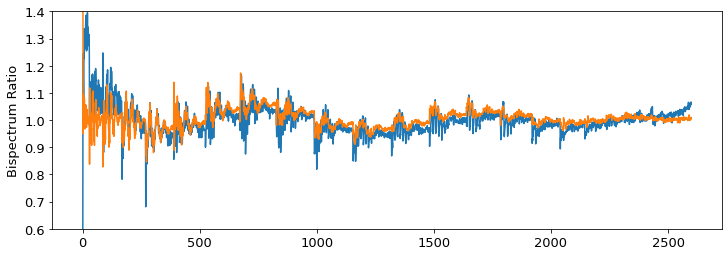

In [30]:
plt.figure(figsize=(12, 4))
plt.plot(bk_a['pk'][:, :, 0].mean(axis=0)/bk_as)
plt.plot(bk_g['pk'].mean(axis=0)/bk_gs['pk'].mean(axis=0))
plt.ylim(0.6, 1.4)
plt.ylabel('Bispectrum Ratio')

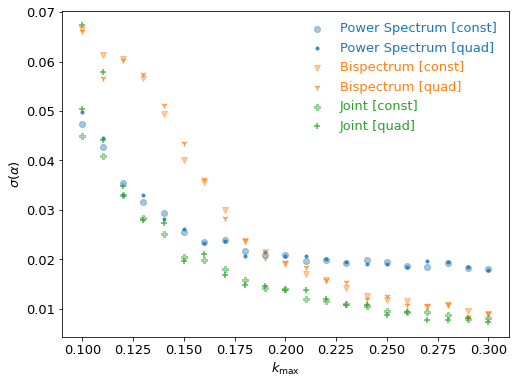

In [3]:
plot_sigma_kmax()

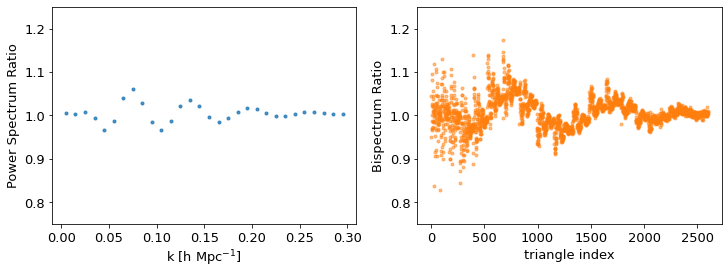

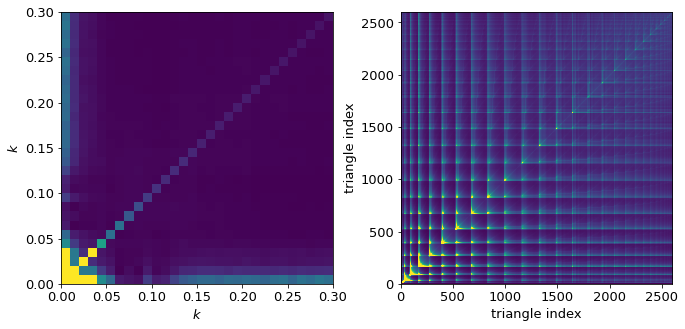

In [4]:
plot_spectra_glam()

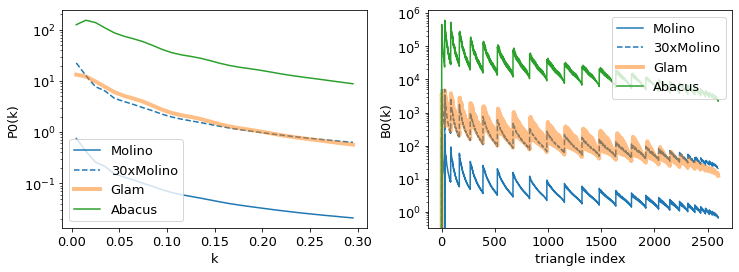

In [5]:
plot_spectra()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


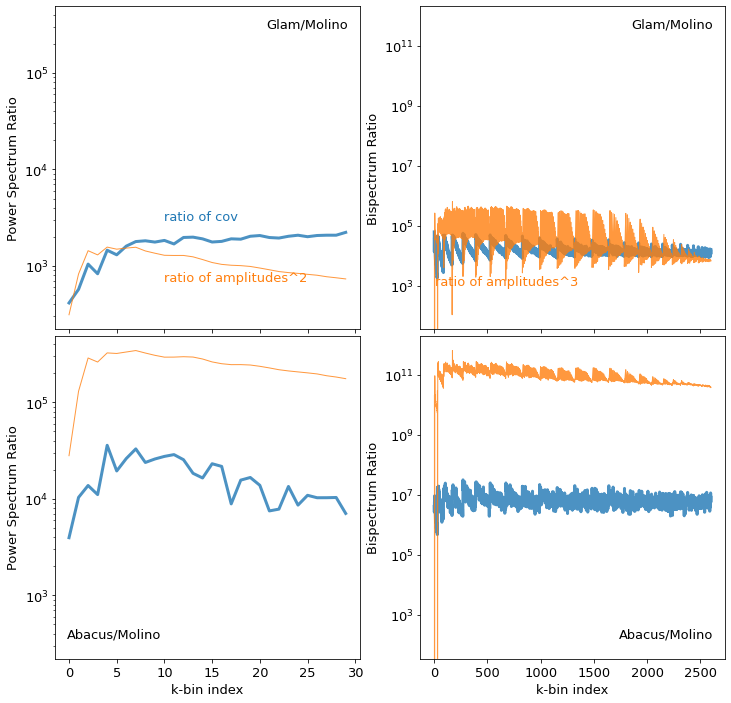

In [13]:
plot_ratios()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


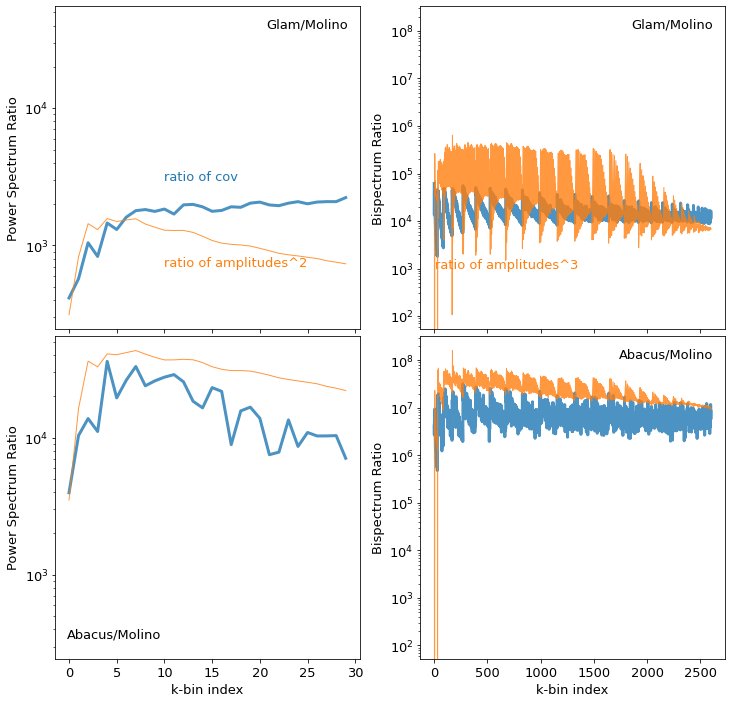

In [7]:
plot_ratios()

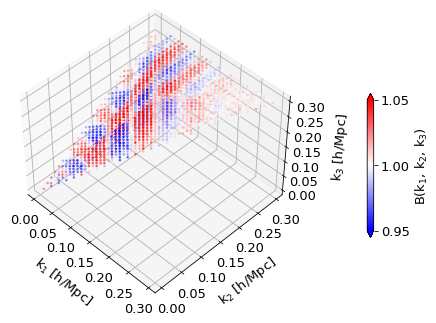

In [7]:
plot_glambk()

In [ ]:
# compare the ratio of covariance (diagonal) to the ratio of amplitudes
# Abacus variance is more sensitive to # of realizations rather than the amplitude